In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn.model_selection as sk
sb.set()

In [2]:
df = pd.read_csv('Google-Playstore.csv')

In [3]:
df.columns = df.columns.str.replace(' ', '')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column            Dtype  
---  ------            -----  
 0   AppName           object 
 1   AppId             object 
 2   Category          object 
 3   Rating            float64
 4   RatingCount       float64
 5   Installs          object 
 6   MinimumInstalls   float64
 7   MaximumInstalls   int64  
 8   Free              bool   
 9   Price             float64
 10  Currency          object 
 11  Size              object 
 12  MinimumAndroid    object 
 13  DeveloperId       object 
 14  DeveloperWebsite  object 
 15  DeveloperEmail    object 
 16  Released          object 
 17  LastUpdated       object 
 18  ContentRating     object 
 19  PrivacyPolicy     object 
 20  AdSupported       bool   
 21  InAppPurchases    bool   
 22  EditorsChoice     bool   
 23  ScrapedTime       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memory usage: 361.8+ MB


In [4]:
pd.set_option('display.max_columns', None)
df

,AppName,AppId,Category,Rating,RatingCount,Installs,MinimumInstalls,MaximumInstalls,Free,Price,Currency,Size,MinimumAndroid,DeveloperId,DeveloperWebsite,DeveloperEmail,Released,LastUpdated,ContentRating,PrivacyPolicy,AdSupported,InAppPurchases,EditorsChoice,ScrapedTime
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,USD,10M,7.1 and up,Jean Confident Irénée NIYIZIBYOSE,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,USD,2.9M,5.0 and up,Webserveis,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,USD,3.7M,4.0.3 and up,Cabin Crew,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,USD,1.8M,4.0.3 and up,Climate Smart Tech2,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,USD,6.2M,4.1 and up,Rafal Milek-Horodyski,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312939,大俠客—熱血歸來,com.rxsj.ssjj,Role Playing,4.3,16775.0,"100,000+",100000.0,337109,True,0.0,USD,77M,4.1 and up,ALICE GAME,http://www.4399sy.com.hk/,ssjjcomhk@gmail.com,NaN,"Jun 01, 2021",Teen,http://a.4399sy.com.hk/user/aggreement,False,False,False,2021-06-16 12:59:18
2312940,ORU Online,com.threedream.oruonline,Education,0.0,0.0,100+,100.0,430,True,0.0,USD,44M,4.1 and up,"3Dream Studios, LLC",http://www.oru.edu/,3DreamDeveloper@gmail.com,"Jan 17, 2018","Feb 02, 2018",Everyone,http://www.oru.edu/about-oru/privacy-policy.php,False,False,False,2021-06-16 12:59:19
2312941,Data Structure,datastructure.appoworld.datastucture,Education,0.0,0.0,100+,100.0,202,True,0.0,USD,29M,5.0 and up,appoworld,NaN,appoworld.official@gmail.com,"Aug 19, 2018","Aug 19, 2018",Everyone,https://appoworld.000webhostapp.com/datastruct...,False,False,False,2021-06-16 12:59:19
2312942,Devi Suktam,ishan.devi.suktam,Music & Audio,3.5,8.0,"1,000+",1000.0,2635,True,0.0,USD,10M,5.0 and up,Bhakti,https://a70f78905.app-ads-txt.com,ruchisono@gmail.com,"Aug 1, 2016","May 05, 2021",Everyone,https://docs.google.com/document/d/1x-9reZuLRX...,True,False,False,2021-06-16 12:59:19


# Dropping columns we do not need (e.g. AppId, DeveloperEmail, etc.)

In [5]:
df.drop(['AppId', 'MinimumInstalls', 'MaximumInstalls', 'Free', 'MinimumAndroid', 
                 'DeveloperId', 'DeveloperWebsite', 'DeveloperEmail', 'PrivacyPolicy'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 15 columns):
 #   Column          Dtype  
---  ------          -----  
 0   AppName         object 
 1   Category        object 
 2   Rating          float64
 3   RatingCount     float64
 4   Installs        object 
 5   Price           float64
 6   Currency        object 
 7   Size            object 
 8   Released        object 
 9   LastUpdated     object 
 10  ContentRating   object 
 11  AdSupported     bool   
 12  InAppPurchases  bool   
 13  EditorsChoice   bool   
 14  ScrapedTime     object 
dtypes: bool(3), float64(3), object(9)
memory usage: 218.4+ MB


- We drop the minimum and maximum installs as these rows may cause multi-collinearity issues with the 'Installs' column.
- We do not care who the current developers are, as our project does not focus on who the developers are, but what a new or any developer can bring to the table in terms of app idea and development strategy

# Removing all rows with null values 

In [6]:
df.isna().sum()

AppName               2
Category              0
Rating            22883
RatingCount       22883
Installs            107
Price                 0
Currency            135
Size                196
Released          71053
LastUpdated           0
ContentRating         0
AdSupported           0
InAppPurchases        0
EditorsChoice         0
ScrapedTime           0
dtype: int64

In [7]:
df_clean = df.dropna()

In [8]:
df_clean.isna().sum()

AppName           0
Category          0
Rating            0
RatingCount       0
Installs          0
Price             0
Currency          0
Size              0
Released          0
LastUpdated       0
ContentRating     0
AdSupported       0
InAppPurchases    0
EditorsChoice     0
ScrapedTime       0
dtype: int64

Since the highest percentage of NA values in any column is about 3% (in the 'Released' column), we can afford to simply drop NA rows.

# Removing all apps with a rating of 0, to avoid using apps that have 0 outreach and/or are brand new

In [9]:
df_clean = df_clean[(df_clean['Rating'] > 0)]

# Selecting only game categories

In [10]:
df_clean['Category'].unique()

array(['Tools', 'Communication', 'Libraries & Demo', 'Lifestyle',
       'Personalization', 'Racing', 'Travel & Local', 'Food & Drink',
       'Puzzle', 'Entertainment', 'Arcade', 'Maps & Navigation',
       'Auto & Vehicles', 'Photography', 'Health & Fitness', 'Shopping',
       'Books & Reference', 'Sports', 'Finance', 'Music & Audio',
       'News & Magazines', 'Casual', 'Productivity', 'Education',
       'Art & Design', 'House & Home', 'Business', 'Card', 'Events',
       'Trivia', 'Weather', 'Board', 'Social', 'Adventure', 'Medical',
       'Strategy', 'Word', 'Beauty', 'Video Players & Editors', 'Action',
       'Simulation', 'Music', 'Dating', 'Role Playing', 'Comics',
       'Educational', 'Casino', 'Parenting'], dtype=object)

In [11]:
games = ['Word', 'Strategy', 'Card', 'Board', 'Trivia', 'Racing', 'Role Playing', 'Adventure', 'Casino',
         'Action', 'Simulation', 'Arcade', 'Puzzle', 'Casual', 'Sports', 'Music', 'Educational']

Categories were verified against an earlier iteration of the code that labelled the categories more specifically, given below:

       'SHOPPING', 'FOOD_AND_DRINK', 'TRAVEL_AND_LOCAL', 'LIFESTYLE',
       'GAME_ACTION', 'GAME_CASUAL', 'GAME_ROLE_PLAYING', 'GAME_PUZZLE',
       'GAME_ADVENTURE', 'GAME_ARCADE', 'GAME_STRATEGY', 'GAME_SPORTS',
       'GAME_SIMULATION', 'GAME_MUSIC', 'MUSIC_AND_AUDIO', 'FINANCE',
       'EVENTS', 'ENTERTAINMENT', 'EDUCATION', 'GAME_EDUCATIONAL',
       'BOOKS_AND_REFERENCE', 'PHOTOGRAPHY', 'VIDEO_PLAYERS',
       'NEWS_AND_MAGAZINES', 'GAME_WORD', 'ART_AND_DESIGN', 'GAME_TRIVIA',
       'GAME_BOARD', 'BUSINESS', 'PRODUCTIVITY', 'COMMUNICATION',
       'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME', 'BEAUTY', 'SOCIAL',
       'MAPS_AND_NAVIGATION', 'GAME_CASINO', 'GAME_CARD', 'SPORTS',
       'AUTO_AND_VEHICLES', 'GAME_RACING', 'TOOLS', 'PERSONALIZATION',
       'LIBRARIES_AND_DEMO', 'COMICS', 'DATING', 'WEATHER', 'PARENTING',
       'MEDICAL'
       
We extracted out the GAME_{} categories according to the above: 

       'GAME_ACTION', 'GAME_CASUAL', 'GAME_ROLE_PLAYING', 'GAME_PUZZLE',
       'GAME_ADVENTURE', 'GAME_ARCADE', 'GAME_STRATEGY', 'GAME_SPORTS',
       'GAME_SIMULATION', 'GAME_MUSIC', 'GAME_EDUCATIONAL', 'GAME_WORD', 'GAME_TRIVIA',
       'GAME_BOARD', 'GAME_CASINO', 'GAME_CARD', 'GAME_RACING'

In [12]:
df_clean = df_clean[df_clean['Category'].isin(games)]

In [13]:
df_clean['Category'].value_counts()

Puzzle          31678
Arcade          30164
Casual          28713
Sports          26042
Simulation      18913
Action          17934
Adventure       15532
Educational     12239
Role Playing     7818
Racing           7512
Trivia           7085
Board            7075
Card             6051
Strategy         5823
Word             5758
Casino           3916
Music            2791
Name: Category, dtype: int64

# Clean 'Size' column, convert all to kilobytes 

In [14]:
df_clean['Size'].value_counts()

Varies with device    11738
19M                    4279
16M                    4214
18M                    4205
15M                    4170
                      ...  
254M                      1
601k                      1
135k                      1
919k                      1
611k                      1
Name: Size, Length: 1229, dtype: int64

In [15]:
df_clean.drop(df_clean[df_clean['Size'] == 'Varies with device'].index, inplace=True) #only about 11,700 rows

In [16]:
def convert_size(x): #convert to kilobytes
    unit = x[-1]
    value = x[0:-1]
    if(unit == 'M'):
        value = value.replace(',', '')
        # value = float(x[0:-1])
        value = float(value)
        value = value*1024
        
    elif(unit == 'k'):
        # value = x[0:-1]
        value = value.replace(',', '')
        value = float(value)
    
    return value

In [17]:
df_clean['Size'] = df_clean.apply(lambda row : convert_size(row['Size']), axis = 1)

In [18]:
df_clean['Size']

10          52224
22          16384
25          25600
43          26624
49          38912
            ...  
2312845     21504
2312846     29696
2312866     22528
2312932     37888
2312943    5324.8
Name: Size, Length: 223306, dtype: object

# 'Installs'

In [19]:
df_clean['Installs'].value_counts()

1,000+            45761
10,000+           39551
100,000+          24880
100+              24455
5,000+            19698
500+              14978
50,000+           13517
1,000,000+        11618
500,000+           8067
50+                7475
10+                7300
10,000,000+        2650
5,000,000+         2615
50,000,000+         339
100,000,000+        185
5+                  166
1+                   20
0+                   19
500,000,000+         11
1,000,000,000+        1
Name: Installs, dtype: int64

In [20]:
installs_0 = ['0+', '1+', '5+', '10+', '50+', '100+', '500+', '1,000+', '5,000+', '10,000+', '50,000+', '100,000+']
df_clean.loc[~df_clean['Installs'].isin(installs_0), 'Installs'].value_counts()

1,000,000+        11618
500,000+           8067
10,000,000+        2650
5,000,000+         2615
50,000,000+         339
100,000,000+        185
500,000,000+         11
1,000,000,000+        1
Name: Installs, dtype: int64

## Turning Installs into a 'High' or 'Low' Variable

In [21]:
df_clean.loc[~df_clean['Installs'].isin(installs_0), 'Installs'] = '>=500000'
df_clean.loc[df_clean['Installs'].isin(installs_0), 'Installs'] = '<500000'

In [22]:
df_clean['Installs'].value_counts()

<500000     197820
>=500000     25486
Name: Installs, dtype: int64

# Convert 'Last Updated' into datetime

In [23]:
from datetime import datetime
df_clean['LastUpdated'] = df_clean.apply(lambda row : datetime.strptime(row['LastUpdated'], '%b %d, %Y'), axis = 1)
df_clean['LastUpdated']

10        2020-07-30
22        2020-05-11
25        2018-03-26
43        2021-05-01
49        2015-03-21
             ...    
2312845   2020-12-22
2312846   2020-08-15
2312866   2016-04-08
2312932   2017-03-06
2312943   2019-08-19
Name: LastUpdated, Length: 223306, dtype: datetime64[ns]

# Convert 'Released' into datetime

In [24]:
df_clean['Released'] = df_clean.apply(lambda row : datetime.strptime(row['Released'], '%b %d, %Y'), axis = 1)
df_clean['Released']

10        2020-07-30
22        2020-03-13
25        2018-03-05
43        2019-07-08
49        2013-04-27
             ...    
2312845   2019-07-17
2312846   2020-07-21
2312866   2016-03-31
2312932   2015-10-29
2312943   2019-08-09
Name: Released, Length: 223306, dtype: datetime64[ns]

# Convert 'ScrapedTime' into datetime

In [25]:
df_clean['ScrapedTime'] = df_clean['ScrapedTime'].astype(str)
df_clean['ScrapedTime'] = df_clean['ScrapedTime'].str.slice(0, 10, 1)

In [26]:
df_clean['ScrapedTime'] = df_clean.apply(lambda row : datetime.strptime(row['ScrapedTime'], '%Y-%m-%d'), axis = 1)
df_clean['ScrapedTime']

10        2021-06-15
22        2021-06-15
25        2021-06-15
43        2021-06-15
49        2021-06-15
             ...    
2312845   2021-06-16
2312846   2021-06-16
2312866   2021-06-16
2312932   2021-06-16
2312943   2021-06-16
Name: ScrapedTime, Length: 223306, dtype: datetime64[ns]

# Get Age of App

In [27]:
df_clean['AppAge'] = df_clean['ScrapedTime'] - df_clean['Released']

In [28]:
df_clean['AppAge']

10         320 days
22         459 days
25        1198 days
43         708 days
49        2971 days
             ...   
2312845    700 days
2312846    330 days
2312866   1903 days
2312932   2057 days
2312943    677 days
Name: AppAge, Length: 223306, dtype: timedelta64[ns]

In [29]:
df_clean['AppAge'] = df_clean['AppAge'].astype(str)
df_clean['AppAge'] = df_clean['AppAge'].str.slice(0, -5, 1)
df_clean['AppAge']

10          320
22          459
25         1198
43          708
49         2971
           ... 
2312845     700
2312846     330
2312866    1903
2312932    2057
2312943     677
Name: AppAge, Length: 223306, dtype: object

# Get DaysSinceLastUpdate

In [30]:
df_clean['DaysSinceLastUpdate'] = df_clean['ScrapedTime'] - df_clean['LastUpdated']
df_clean['DaysSinceLastUpdate'] = df_clean['DaysSinceLastUpdate'].astype(str)
df_clean['DaysSinceLastUpdate'] = df_clean['DaysSinceLastUpdate'].str.slice(0, -5, 1)
df_clean['DaysSinceLastUpdate']

10          320
22          400
25         1177
43           45
49         2278
           ... 
2312845     176
2312846     305
2312866    1895
2312932    1563
2312943     667
Name: DaysSinceLastUpdate, Length: 223306, dtype: object

In [31]:
# we can now drop the 'ScrapedTime', 'Released' and 'LastUpdated' column
df_clean.drop(['ScrapedTime', 'Released', 'LastUpdated'], axis = 1, inplace = True)

# Drop rows with Currency not in USD (since there are very few)

In [32]:
df_clean['Currency'].value_counts()

USD    223203
XXX        99
EUR         1
VND         1
BRL         1
GBP         1
Name: Currency, dtype: int64

In [33]:
not_USD = ['XXX', 'GBP', 'EUR', 'VND', 'BRL']
df_clean.drop(df_clean[df_clean['Currency'].isin(not_USD)].index, inplace = True)

In [34]:
df_clean['Currency'].value_counts()

USD    223203
Name: Currency, dtype: int64

In [35]:
# we can now drop the 'Currency' column
df_clean.drop(['Currency'], axis = 1, inplace = True)

# Drop duplicate apps

In [36]:
df_clean.duplicated(subset = ['AppName']).sum()

8686

In [37]:
df_clean.drop_duplicates(subset = ['AppName'], inplace = True)
df_clean.duplicated(subset = ['AppName']).sum()

0

# Clean 'Price' column

In [38]:
df_clean['Price'].describe()

count    214517.000000
mean          0.124413
std           2.356957
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         399.990000
Name: Price, dtype: float64

In [39]:
rows = df_clean['Price'].nlargest(n=20)
rows

644212     399.99
1399820    399.99
1444845    399.99
677674     338.99
600723     269.99
1442420    244.99
1344894    214.99
1442297    199.99
1604842    179.99
581593     174.99
587522     169.99
392695     139.99
2148337    129.99
1498531    119.99
708456     104.99
543897      99.99
1323797     81.37
2072857     79.99
1343948     74.99
295260      69.99
Name: Price, dtype: float64

In [40]:
df_clean.loc[df_clean['Price'].isin(rows)]

,AppName,Category,Rating,RatingCount,Installs,Price,Size,ContentRating,AdSupported,InAppPurchases,EditorsChoice,AppAge,DaysSinceLastUpdate
295260,SnapShove Pro,Card,4.1,40.0,<500000,69.99,19456,Everyone,False,True,False,1952,592
392695,Výukové kartičky - školní multilicence,Educational,4.7,61.0,<500000,139.99,37888,Everyone,True,False,False,2381,2675
543897,Real Bet VIP Correct Score Betting Tips,Sports,4.8,131.0,<500000,99.99,10240,Teen,False,False,False,701,701
581593,HOT FIXED MATCHES 100% SURE,Sports,4.6,31.0,<500000,174.99,7680,Everyone,True,False,False,625,625
587522,Alex Ferguso ELITE Betting Tips ( FIXED ),Sports,4.9,49.0,<500000,169.99,5120,Teen,False,False,False,172,172
600723,Most Expensive Ball Jump Game,Arcade,5.0,10.0,<500000,269.99,15360,Everyone,False,False,False,570,570
644212,Challenge Impossible Ball for you,Arcade,5.0,6.0,<500000,399.99,11264,Everyone,False,False,False,463,379
677674,Mega Tips Bet Premium (LifeTime),Sports,4.4,28.0,<500000,338.99,3481.6,Everyone,False,False,False,729,233
708456,Alex Ferguso VIP HT/FT Betting Tips,Sports,4.8,46.0,<500000,104.99,5120,Teen,False,False,False,176,176
1323797,Mourinho Tactical Board Pro,Sports,4.5,6.0,<500000,81.37,22528,Everyone,False,False,False,3245,1579


They seem to be junk apps, with high prices and not very many downloads. However, we can leave them all in as they provide insights into the data

# Clean ContentRating column

In [41]:
df_clean['ContentRating'].value_counts()

Everyone           166888
Teen                31786
Everyone 10+        11325
Mature 17+           4442
Adults only 18+        40
Unrated                36
Name: ContentRating, dtype: int64

In [42]:
df_clean.drop(df_clean[df_clean['ContentRating'] == 'Unrated'].index, inplace = True)

# Determine value of Rating and RatingCount that we can use to determine if an app is good

In [43]:
df_clean.describe()[['Rating']]

,Rating
count,214481.000000
mean,4.093965
std,0.623998
min,1.000000
25%,3.700000
50%,4.200000
75%,4.500000
max,5.000000


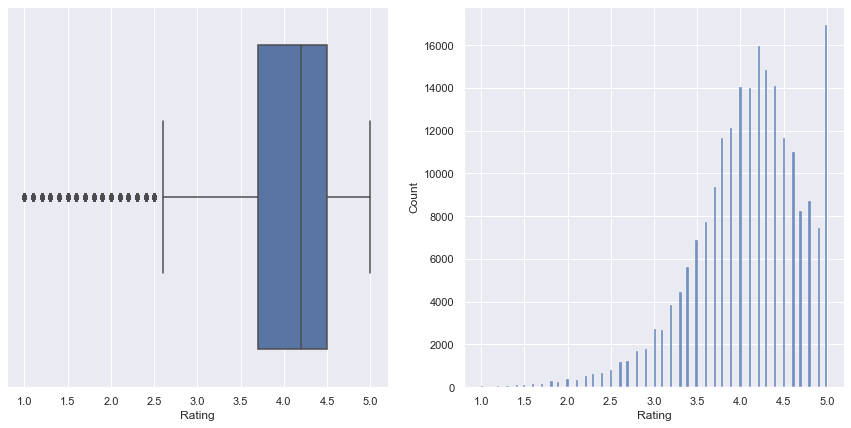

In [44]:
f, axes = plt.subplots(1, 2, figsize = (15,7))

sb.boxplot(data = df_clean, x = 'Rating', orient = 'h', ax = axes[0])
sb.histplot(data = df_clean, x = 'Rating', ax = axes[1])
plt.savefig('rating.png', transparent = True)

We will use the mean value of about 4.0 for Rating

In [45]:
df_clean['RatingCount'].astype('int64')
df_clean.describe()[['RatingCount']]

,RatingCount
count,2.144810e+05
mean,1.006650e+04
std,2.172601e+05
min,5.000000e+00
25%,1.300000e+01
50%,5.000000e+01
75%,4.210000e+02
max,5.602542e+07


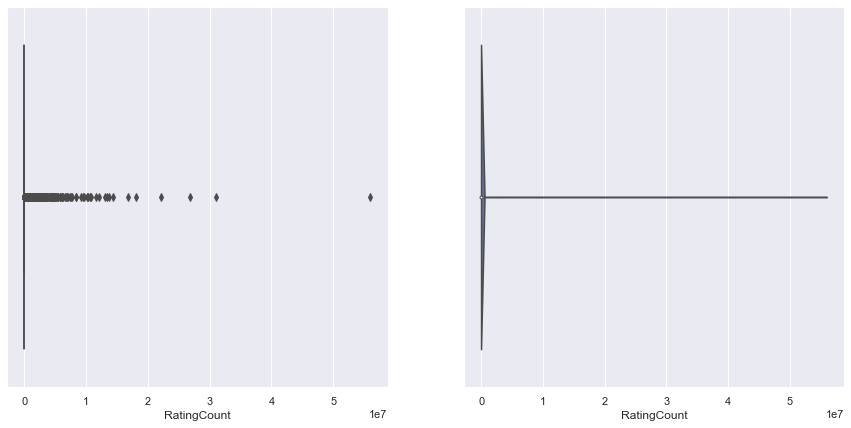

In [46]:
f, axes = plt.subplots(1, 2, figsize = (15,7))

sb.boxplot(data = df_clean, x = 'RatingCount', orient = 'h', ax = axes[0])
sb.violinplot(data = df_clean, x = 'RatingCount', ax = axes[1])
plt.savefig('ratingcount.png', transparent = True)

In [47]:
df_clean[df_clean['RatingCount'] == max(df_clean['RatingCount'])]

,AppName,Category,Rating,RatingCount,Installs,Price,Size,ContentRating,AdSupported,InAppPurchases,EditorsChoice,AppAge,DaysSinceLastUpdate
423997,Clash of Clans,Strategy,4.5,56025424.0,>=500000,0.0,186368,Everyone 10+,False,True,True,2816,7


We won't remove this outlier because it's a legitimate app. We'll use the median of RatingCount, as it is highly positively skewed (mean is more affected by skew than median). The median is about 50.

# Creating a 'GoodApp' column, based off 'Installs', 'Rating', and 'RatingCount' 


In [48]:
df_clean.reset_index(inplace = True)

In [49]:
df_clean['GoodApp'] = pd.Series(dtype='bool')

In [50]:
for i in range(len(df_clean)):
    if (df_clean.loc[i,'Installs'] == '>=500000' and df_clean.loc[i,'Rating'] >= 4.0 
        and df_clean.loc[i,'RatingCount'] >= 50):
        print(i, df_clean.loc[i,'Installs'], df_clean.loc[i,'Rating'], df_clean.loc[i,'RatingCount']) # so you can see it running
        df_clean.loc[i,'GoodApp'] = True
    else:
        df_clean.loc[i,'GoodApp'] = False

9 >=500000 4.2 5102.0
55 >=500000 4.5 2523.0
62 >=500000 4.1 20122.0
65 >=500000 4.4 7658.0
68 >=500000 4.0 19156.0
73 >=500000 4.3 135731.0
75 >=500000 4.1 146998.0
76 >=500000 4.0 1779.0
84 >=500000 4.6 38579.0
89 >=500000 4.4 115904.0
110 >=500000 4.0 39472.0
141 >=500000 4.0 33032.0
146 >=500000 4.4 32469.0
162 >=500000 4.3 64696.0
166 >=500000 4.0 31231.0
179 >=500000 4.1 4786.0
188 >=500000 4.7 12808.0
197 >=500000 4.2 14152.0
228 >=500000 4.5 11370.0
230 >=500000 4.2 804.0
233 >=500000 4.2 17837.0
236 >=500000 4.1 3892.0
251 >=500000 4.6 17419.0
274 >=500000 4.6 80681.0
309 >=500000 4.4 208278.0
313 >=500000 4.0 6113.0
378 >=500000 4.1 2578.0
387 >=500000 4.3 16857.0
392 >=500000 4.4 15353.0
417 >=500000 4.0 2112.0
418 >=500000 4.5 9374.0
429 >=500000 4.2 124571.0
448 >=500000 4.0 54717.0
462 >=500000 4.0 20229.0
487 >=500000 4.2 7138.0
489 >=500000 4.2 21920.0
503 >=500000 4.0 14781.0
504 >=500000 4.2 222694.0
518 >=500000 4.3 5789.0
519 >=500000 4.0 4389.0
533 >=500000 4.2 668

4424 >=500000 4.1 2187.0
4427 >=500000 4.2 52977.0
4433 >=500000 4.4 12954.0
4444 >=500000 4.0 16153.0
4472 >=500000 4.0 60791.0
4474 >=500000 4.4 5962.0
4477 >=500000 4.0 3865.0
4486 >=500000 4.0 4268.0
4499 >=500000 4.0 15860.0
4502 >=500000 4.0 9932.0
4514 >=500000 4.1 20709.0
4522 >=500000 4.0 7785.0
4539 >=500000 4.0 50097.0
4555 >=500000 4.4 107378.0
4589 >=500000 4.3 6938.0
4596 >=500000 4.2 91373.0
4603 >=500000 4.3 30701.0
4608 >=500000 4.1 27016.0
4614 >=500000 4.3 28100.0
4636 >=500000 4.0 12227.0
4654 >=500000 4.7 33192.0
4710 >=500000 4.3 13654.0
4712 >=500000 4.1 10826.0
4724 >=500000 4.5 3593.0
4734 >=500000 4.1 1776.0
4743 >=500000 4.1 268943.0
4744 >=500000 4.0 216.0
4765 >=500000 4.6 316661.0
4780 >=500000 4.1 2482.0
4826 >=500000 4.3 381015.0
4827 >=500000 4.4 1839.0
4846 >=500000 4.4 61164.0
4876 >=500000 4.1 8310.0
4878 >=500000 4.0 121541.0
4880 >=500000 4.5 10768.0
4897 >=500000 4.6 308036.0
4919 >=500000 4.3 44741.0
4924 >=500000 4.5 78740.0
4933 >=500000 4.3 14

8644 >=500000 4.3 26745.0
8648 >=500000 4.1 14978.0
8652 >=500000 4.1 119.0
8665 >=500000 4.0 696296.0
8678 >=500000 4.1 331039.0
8691 >=500000 4.6 6597.0
8698 >=500000 4.0 4250.0
8711 >=500000 4.3 6895.0
8714 >=500000 4.9 1792.0
8718 >=500000 4.0 3900.0
8730 >=500000 4.3 301555.0
8737 >=500000 4.6 45923.0
8744 >=500000 4.5 16281.0
8750 >=500000 4.1 62413.0
8768 >=500000 4.3 41862.0
8770 >=500000 4.1 89255.0
8787 >=500000 4.4 41556.0
8789 >=500000 4.2 818212.0
8791 >=500000 4.3 67373.0
8796 >=500000 4.1 1170.0
8815 >=500000 4.2 16604.0
8823 >=500000 4.0 237.0
8824 >=500000 4.2 29237.0
8832 >=500000 4.0 6908.0
8843 >=500000 4.3 205696.0
8848 >=500000 4.1 205620.0
8858 >=500000 4.0 23677.0
8862 >=500000 4.7 55387.0
8873 >=500000 4.0 10967.0
8874 >=500000 4.1 372488.0
8892 >=500000 4.5 106073.0
8902 >=500000 4.3 26859.0
8906 >=500000 4.0 4722.0
8927 >=500000 4.6 9170.0
8944 >=500000 4.2 3075.0
8970 >=500000 4.1 16210.0
8991 >=500000 4.1 15780.0
9006 >=500000 4.1 28518.0
9009 >=500000 4.0 

12636 >=500000 4.0 19535.0
12652 >=500000 4.1 5170.0
12662 >=500000 4.1 39719.0
12679 >=500000 4.3 99363.0
12684 >=500000 4.4 2598.0
12704 >=500000 4.3 2986.0
12705 >=500000 4.5 45712.0
12707 >=500000 4.2 9555.0
12710 >=500000 4.1 37641.0
12714 >=500000 4.5 37797.0
12730 >=500000 4.3 19633.0
12739 >=500000 4.0 42811.0
12740 >=500000 4.3 46393.0
12775 >=500000 4.4 14605.0
12779 >=500000 4.0 11532.0
12802 >=500000 4.4 73210.0
12813 >=500000 4.5 21972.0
12818 >=500000 4.4 101371.0
12832 >=500000 4.1 2276.0
12834 >=500000 4.0 2021.0
12847 >=500000 4.4 35284.0
12849 >=500000 4.1 1781.0
12851 >=500000 4.5 900156.0
12854 >=500000 4.1 858.0
12869 >=500000 4.3 2467.0
12871 >=500000 4.0 266497.0
12913 >=500000 4.4 7838.0
12947 >=500000 4.1 4507.0
12960 >=500000 4.5 7231.0
12963 >=500000 4.1 7100.0
12999 >=500000 4.0 27130.0
13000 >=500000 4.2 24762.0
13005 >=500000 4.0 7787.0
13014 >=500000 4.3 1456205.0
13056 >=500000 4.2 266527.0
13070 >=500000 4.4 25407.0
13081 >=500000 4.1 279.0
13085 >=5000

16630 >=500000 4.6 43715.0
16641 >=500000 4.6 26626.0
16652 >=500000 4.5 270447.0
16655 >=500000 4.1 207694.0
16670 >=500000 4.3 16336.0
16697 >=500000 4.5 115561.0
16725 >=500000 4.1 6035.0
16726 >=500000 4.6 125221.0
16740 >=500000 4.8 84478.0
16754 >=500000 4.1 21459.0
16774 >=500000 4.7 8706.0
16777 >=500000 4.0 27297.0
16795 >=500000 4.4 134887.0
16800 >=500000 4.2 94607.0
16811 >=500000 4.5 51225.0
16816 >=500000 4.0 49807.0
16821 >=500000 4.0 32441.0
16842 >=500000 4.3 34637.0
16847 >=500000 4.4 96420.0
16862 >=500000 4.5 8283.0
16868 >=500000 4.7 4370.0
16900 >=500000 4.4 176584.0
16916 >=500000 4.0 61478.0
16927 >=500000 4.1 54580.0
16931 >=500000 4.3 35112.0
16936 >=500000 4.2 1467.0
16951 >=500000 4.2 30808.0
16965 >=500000 4.3 26703.0
16989 >=500000 4.2 4480.0
17017 >=500000 4.0 5467.0
17019 >=500000 4.3 15067.0
17027 >=500000 4.2 10354.0
17029 >=500000 4.0 8396.0
17081 >=500000 4.2 30985.0
17087 >=500000 4.2 3930.0
17090 >=500000 4.3 32272.0
17102 >=500000 4.0 5736.0
17120

20906 >=500000 4.4 391903.0
20909 >=500000 4.1 5094.0
20925 >=500000 4.1 2461.0
20931 >=500000 4.0 4367.0
20977 >=500000 4.0 2371.0
21004 >=500000 4.6 19722.0
21023 >=500000 4.3 52900.0
21039 >=500000 4.6 71863.0
21062 >=500000 4.5 21783.0
21077 >=500000 4.1 10167.0
21085 >=500000 4.1 104646.0
21087 >=500000 4.2 14331.0
21098 >=500000 4.2 2902.0
21106 >=500000 4.3 9436.0
21110 >=500000 4.1 24307.0
21156 >=500000 4.1 315907.0
21192 >=500000 4.3 85166.0
21194 >=500000 4.1 2400.0
21207 >=500000 4.2 9035.0
21211 >=500000 4.0 1145.0
21220 >=500000 4.6 45108.0
21221 >=500000 4.2 148429.0
21223 >=500000 4.4 6581.0
21234 >=500000 4.1 180580.0
21255 >=500000 4.4 50556.0
21268 >=500000 4.3 147338.0
21300 >=500000 4.4 11665.0
21364 >=500000 4.4 114823.0
21366 >=500000 4.4 50825.0
21370 >=500000 4.5 97496.0
21391 >=500000 4.4 990044.0
21404 >=500000 4.7 51600.0
21413 >=500000 4.2 153471.0
21435 >=500000 4.5 10243.0
21446 >=500000 4.3 20127.0
21458 >=500000 4.7 26267.0
21475 >=500000 4.0 5438.0
214

25495 >=500000 4.4 9334.0
25507 >=500000 4.2 6247.0
25512 >=500000 4.5 13969.0
25520 >=500000 4.0 4226.0
25522 >=500000 4.1 33764.0
25555 >=500000 4.2 19008.0
25565 >=500000 4.4 265209.0
25567 >=500000 4.2 43062.0
25576 >=500000 4.0 6724.0
25585 >=500000 4.4 12043.0
25590 >=500000 4.0 1722.0
25600 >=500000 4.0 3280.0
25605 >=500000 4.1 11174.0
25616 >=500000 4.6 11544.0
25636 >=500000 4.4 2235503.0
25643 >=500000 4.5 13174.0
25670 >=500000 4.3 1937.0
25692 >=500000 4.3 7598.0
25712 >=500000 4.3 11886.0
25754 >=500000 4.1 9156.0
25759 >=500000 4.2 1776.0
25766 >=500000 4.1 8273.0
25767 >=500000 4.3 871.0
25768 >=500000 4.1 2544.0
25773 >=500000 4.8 4265.0
25807 >=500000 4.2 29159.0
25821 >=500000 4.2 1426036.0
25822 >=500000 4.3 26481.0
25829 >=500000 4.3 199450.0
25835 >=500000 4.1 11478.0
25840 >=500000 4.1 7174.0
25899 >=500000 4.3 960586.0
25909 >=500000 4.5 40922.0
25915 >=500000 4.0 5175.0
25922 >=500000 4.2 15451.0
25930 >=500000 4.0 5038.0
25931 >=500000 4.1 622.0
25944 >=500000

29490 >=500000 4.3 154711.0
29512 >=500000 4.2 46588.0
29535 >=500000 4.0 1507.0
29536 >=500000 4.2 15037.0
29537 >=500000 4.3 27709.0
29561 >=500000 4.2 5912.0
29567 >=500000 4.6 89058.0
29578 >=500000 4.1 31226.0
29595 >=500000 4.0 2160.0
29602 >=500000 4.0 8076.0
29609 >=500000 4.6 14305.0
29635 >=500000 4.2 1320.0
29649 >=500000 4.1 17212.0
29664 >=500000 4.1 1469.0
29665 >=500000 4.3 2123.0
29684 >=500000 4.0 8298.0
29688 >=500000 4.2 7483.0
29695 >=500000 4.2 11120.0
29709 >=500000 4.2 14772.0
29751 >=500000 4.3 32817.0
29755 >=500000 4.4 1607.0
29767 >=500000 4.5 43595.0
29768 >=500000 4.0 25060.0
29786 >=500000 4.4 81235.0
29793 >=500000 4.5 241142.0
29796 >=500000 4.2 8654.0
29798 >=500000 4.1 292473.0
29803 >=500000 4.0 4160.0
29853 >=500000 4.4 11228.0
29856 >=500000 4.1 19028.0
29894 >=500000 4.7 73604.0
29898 >=500000 4.4 685351.0
29903 >=500000 4.0 2705.0
29914 >=500000 4.5 159437.0
29925 >=500000 4.3 261488.0
29927 >=500000 4.4 4841.0
29987 >=500000 4.3 5849.0
29995 >=50

33497 >=500000 4.7 79082.0
33510 >=500000 4.1 5068.0
33535 >=500000 4.1 837.0
33540 >=500000 4.4 60115.0
33543 >=500000 4.6 93068.0
33552 >=500000 4.1 15770.0
33563 >=500000 4.4 466911.0
33583 >=500000 4.2 5944.0
33603 >=500000 4.3 168091.0
33626 >=500000 4.5 41809.0
33633 >=500000 4.5 162113.0
33640 >=500000 4.6 2500.0
33645 >=500000 4.3 1307611.0
33659 >=500000 4.2 18326.0
33662 >=500000 4.2 7933.0
33664 >=500000 4.1 31225.0
33682 >=500000 4.2 261.0
33699 >=500000 4.1 5832.0
33709 >=500000 4.5 21528.0
33715 >=500000 4.2 77154.0
33725 >=500000 4.2 8648.0
33750 >=500000 4.0 3905.0
33762 >=500000 4.5 17453.0
33797 >=500000 4.3 11780.0
33803 >=500000 4.3 175107.0
33810 >=500000 4.3 88157.0
33832 >=500000 4.4 386348.0
33837 >=500000 4.2 10123.0
33856 >=500000 4.2 10899.0
33859 >=500000 4.5 4853.0
33905 >=500000 4.5 35164.0
33914 >=500000 4.4 25236.0
33918 >=500000 4.4 84246.0
33919 >=500000 4.3 3713.0
33937 >=500000 4.4 32012.0
33942 >=500000 4.0 2833.0
33943 >=500000 4.3 238408.0
33953 >

37522 >=500000 4.5 11891.0
37524 >=500000 4.4 10185.0
37544 >=500000 4.2 481.0
37559 >=500000 4.3 42747.0
37568 >=500000 4.1 12344.0
37570 >=500000 4.1 1163.0
37579 >=500000 4.2 286861.0
37589 >=500000 4.2 2621.0
37601 >=500000 4.8 22085.0
37645 >=500000 4.6 12945.0
37667 >=500000 4.0 59460.0
37707 >=500000 4.6 69131.0
37712 >=500000 4.3 2822.0
37724 >=500000 4.2 6087.0
37741 >=500000 4.5 914123.0
37762 >=500000 4.1 4706.0
37766 >=500000 4.1 30102.0
37794 >=500000 4.4 61053.0
37820 >=500000 4.5 31784.0
37828 >=500000 4.2 155953.0
37863 >=500000 4.6 140072.0
37865 >=500000 4.3 6606.0
37875 >=500000 4.1 38112.0
37899 >=500000 4.2 4337.0
37903 >=500000 4.3 24368.0
37910 >=500000 4.0 43553.0
37945 >=500000 4.0 960.0
37957 >=500000 4.3 52840.0
37959 >=500000 4.5 34977.0
37964 >=500000 4.4 499453.0
37972 >=500000 4.3 20458.0
37981 >=500000 4.0 7142.0
37984 >=500000 4.5 8231.0
37988 >=500000 4.7 71103.0
37990 >=500000 4.6 10793.0
38015 >=500000 4.1 8519.0
38019 >=500000 4.2 48578.0
38022 >=50

41877 >=500000 4.0 16080.0
41917 >=500000 4.3 1992683.0
41919 >=500000 4.4 58814.0
41935 >=500000 4.2 328428.0
41948 >=500000 4.0 2480.0
42023 >=500000 4.3 24755.0
42026 >=500000 4.2 20862.0
42031 >=500000 4.3 4102.0
42070 >=500000 4.0 7751.0
42073 >=500000 4.0 1134.0
42085 >=500000 4.0 4406.0
42098 >=500000 4.1 14076.0
42128 >=500000 4.4 12856.0
42131 >=500000 4.0 44632.0
42132 >=500000 4.5 10017.0
42143 >=500000 4.1 1537.0
42144 >=500000 4.3 20102.0
42248 >=500000 4.1 8913.0
42285 >=500000 4.5 24524.0
42286 >=500000 4.6 223963.0
42287 >=500000 4.4 21706.0
42299 >=500000 4.3 13894.0
42312 >=500000 4.2 9831.0
42329 >=500000 4.6 114758.0
42339 >=500000 4.6 46908.0
42346 >=500000 4.7 5466.0
42366 >=500000 4.4 215204.0
42373 >=500000 4.6 7194.0
42382 >=500000 4.6 41652.0
42393 >=500000 4.3 22987.0
42395 >=500000 4.2 1393.0
42398 >=500000 4.2 2799.0
42410 >=500000 4.1 52626.0
42439 >=500000 4.4 13096.0
42451 >=500000 4.2 8405.0
42455 >=500000 4.2 31687.0
42457 >=500000 4.0 65924.0
42460 >=

46016 >=500000 4.0 7865.0
46019 >=500000 4.0 3417.0
46031 >=500000 4.0 12568.0
46035 >=500000 4.3 18746.0
46038 >=500000 4.3 41936.0
46051 >=500000 4.0 8208.0
46087 >=500000 4.4 22077.0
46107 >=500000 4.1 9227.0
46117 >=500000 4.2 2373.0
46120 >=500000 4.2 177288.0
46142 >=500000 4.4 38211.0
46161 >=500000 4.3 2703.0
46185 >=500000 4.0 3164.0
46194 >=500000 4.1 35188.0
46201 >=500000 4.4 3251.0
46208 >=500000 4.3 3882.0
46228 >=500000 4.3 70073.0
46239 >=500000 4.3 308.0
46279 >=500000 4.2 5065.0
46289 >=500000 4.1 265.0
46305 >=500000 4.0 92318.0
46329 >=500000 4.4 10410.0
46348 >=500000 4.4 28896.0
46352 >=500000 4.1 12833.0
46354 >=500000 4.5 21107.0
46377 >=500000 4.1 8839.0
46378 >=500000 4.3 128405.0
46382 >=500000 4.0 16419.0
46393 >=500000 4.2 10237.0
46399 >=500000 4.0 18095.0
46406 >=500000 4.4 1013.0
46438 >=500000 4.3 4994.0
46487 >=500000 4.1 6130.0
46519 >=500000 4.4 65453.0
46531 >=500000 4.6 125739.0
46558 >=500000 4.2 22665.0
46559 >=500000 4.2 55665.0
46577 >=500000 4

50362 >=500000 4.1 4949.0
50363 >=500000 4.2 4142.0
50370 >=500000 4.4 131542.0
50389 >=500000 4.0 5680.0
50391 >=500000 4.1 8260.0
50399 >=500000 4.0 8385.0
50403 >=500000 4.5 631048.0
50409 >=500000 4.5 104016.0
50414 >=500000 4.1 8199.0
50426 >=500000 4.0 15022.0
50441 >=500000 4.0 4558.0
50457 >=500000 4.3 17619.0
50462 >=500000 4.6 51045.0
50467 >=500000 4.3 36500.0
50468 >=500000 4.1 1645.0
50482 >=500000 4.6 10832.0
50488 >=500000 4.3 8260.0
50491 >=500000 4.0 11191.0
50530 >=500000 4.4 14417.0
50535 >=500000 4.4 1088.0
50546 >=500000 4.6 11171.0
50579 >=500000 4.6 11994.0
50581 >=500000 4.5 251734.0
50596 >=500000 4.0 8038.0
50613 >=500000 4.1 9125.0
50638 >=500000 4.2 1012.0
50677 >=500000 4.1 29894.0
50685 >=500000 4.1 61415.0
50703 >=500000 4.0 10890.0
50706 >=500000 4.0 81605.0
50709 >=500000 4.0 167.0
50718 >=500000 4.0 11413.0
50720 >=500000 4.3 8494.0
50735 >=500000 4.0 21948.0
50740 >=500000 4.0 1941.0
50742 >=500000 4.7 30979.0
50760 >=500000 4.3 6680.0
50768 >=500000 

54887 >=500000 4.4 466697.0
54889 >=500000 4.0 30788.0
54907 >=500000 4.6 25728.0
54927 >=500000 4.2 5020.0
54958 >=500000 4.1 347421.0
54964 >=500000 4.2 49369.0
54966 >=500000 4.4 37491.0
54971 >=500000 4.1 28736.0
54988 >=500000 4.0 3369.0
55005 >=500000 4.4 401921.0
55010 >=500000 4.5 40162.0
55016 >=500000 4.1 18706.0
55082 >=500000 4.2 12180.0
55099 >=500000 4.5 335835.0
55102 >=500000 4.3 27807.0
55114 >=500000 4.6 16248.0
55117 >=500000 4.8 54653.0
55162 >=500000 4.0 426481.0
55186 >=500000 4.2 328299.0
55241 >=500000 4.3 35107.0
55259 >=500000 4.0 12326.0
55267 >=500000 4.3 5060.0
55271 >=500000 4.2 20173.0
55281 >=500000 4.4 260228.0
55282 >=500000 4.2 5347.0
55290 >=500000 4.3 6982.0
55321 >=500000 4.4 49314.0
55343 >=500000 4.5 14108.0
55351 >=500000 4.0 13976.0
55360 >=500000 4.5 109661.0
55384 >=500000 4.1 34178.0
55394 >=500000 4.4 41919.0
55406 >=500000 4.1 2354.0
55420 >=500000 4.1 567.0
55424 >=500000 4.6 11714.0
55446 >=500000 4.1 153543.0
55447 >=500000 4.1 113871.0

59013 >=500000 4.1 33119.0
59045 >=500000 4.4 23018.0
59102 >=500000 4.6 38188.0
59105 >=500000 4.7 46876.0
59124 >=500000 4.1 5231.0
59168 >=500000 4.5 2922.0
59200 >=500000 4.7 201442.0
59213 >=500000 4.4 58290.0
59219 >=500000 4.3 95410.0
59225 >=500000 4.3 3297.0
59228 >=500000 4.3 35021.0
59234 >=500000 4.1 62309.0
59239 >=500000 4.6 178345.0
59250 >=500000 4.0 3131.0
59260 >=500000 4.1 52391.0
59286 >=500000 4.1 2945.0
59294 >=500000 4.1 47981.0
59296 >=500000 4.5 28434.0
59307 >=500000 4.0 1373.0
59310 >=500000 4.4 81423.0
59335 >=500000 4.6 35647.0
59336 >=500000 4.5 2679.0
59382 >=500000 4.0 43778.0
59405 >=500000 4.4 189375.0
59426 >=500000 4.6 90020.0
59428 >=500000 4.3 5620.0
59461 >=500000 4.2 5068.0
59468 >=500000 4.3 726.0
59478 >=500000 4.1 500962.0
59495 >=500000 4.1 14611.0
59499 >=500000 4.4 10157.0
59505 >=500000 4.2 18742.0
59533 >=500000 4.0 11904.0
59536 >=500000 4.3 4224.0
59545 >=500000 4.4 5560.0
59549 >=500000 4.2 27055.0
59553 >=500000 4.0 5380.0
59567 >=500

62968 >=500000 4.3 9718.0
62969 >=500000 4.1 54670.0
62994 >=500000 4.3 1535.0
63006 >=500000 4.4 6985.0
63010 >=500000 4.3 9709.0
63035 >=500000 4.2 6325.0
63036 >=500000 4.5 30105.0
63047 >=500000 4.7 49444.0
63050 >=500000 4.1 10974.0
63081 >=500000 4.2 54054.0
63085 >=500000 4.2 58039.0
63086 >=500000 4.3 270923.0
63092 >=500000 4.1 42525.0
63094 >=500000 4.9 6695.0
63095 >=500000 4.5 33369.0
63112 >=500000 4.2 37004.0
63115 >=500000 4.1 9546.0
63135 >=500000 4.1 2282.0
63137 >=500000 4.4 75008.0
63173 >=500000 4.2 14810.0
63203 >=500000 4.0 313066.0
63209 >=500000 4.5 300685.0
63227 >=500000 4.2 4317.0
63235 >=500000 4.0 23084.0
63242 >=500000 4.1 2463.0
63250 >=500000 4.1 1348.0
63252 >=500000 4.5 12781.0
63256 >=500000 4.5 32706.0
63265 >=500000 4.0 29844.0
63294 >=500000 4.0 45247.0
63339 >=500000 4.3 224795.0
63343 >=500000 4.1 809.0
63362 >=500000 4.2 1565.0
63379 >=500000 4.5 491750.0
63387 >=500000 4.1 3434.0
63412 >=500000 4.3 4592.0
63415 >=500000 4.4 66914.0
63438 >=5000

66802 >=500000 4.1 1402266.0
66806 >=500000 4.1 9125.0
66836 >=500000 4.2 48330.0
66843 >=500000 4.2 7570.0
66847 >=500000 4.6 56865.0
66855 >=500000 4.3 110903.0
66874 >=500000 4.2 8003.0
66881 >=500000 4.3 213419.0
66888 >=500000 4.2 23196.0
66892 >=500000 4.5 4416.0
66907 >=500000 4.1 16670.0
66911 >=500000 4.2 16051.0
66940 >=500000 4.5 290204.0
66950 >=500000 4.0 81411.0
66952 >=500000 4.2 116406.0
66958 >=500000 4.2 11065.0
66961 >=500000 4.0 5441.0
67004 >=500000 4.3 14120.0
67051 >=500000 4.1 19397.0
67061 >=500000 4.5 28668.0
67066 >=500000 4.2 132658.0
67073 >=500000 4.4 37279.0
67074 >=500000 4.5 3287.0
67092 >=500000 4.3 313732.0
67107 >=500000 4.0 138728.0
67112 >=500000 4.0 12107.0
67120 >=500000 4.1 209202.0
67143 >=500000 4.1 1189.0
67184 >=500000 4.6 28435.0
67188 >=500000 4.6 367752.0
67200 >=500000 4.3 60870.0
67201 >=500000 4.8 19358.0
67210 >=500000 4.2 1471029.0
67216 >=500000 4.2 66972.0
67221 >=500000 4.7 6255.0
67240 >=500000 4.2 9482.0
67261 >=500000 4.0 1941.

70879 >=500000 4.0 5855.0
70883 >=500000 4.3 14615.0
70894 >=500000 4.4 25634.0
70895 >=500000 4.8 258703.0
70896 >=500000 4.3 157201.0
70908 >=500000 4.5 47459.0
70937 >=500000 4.0 126487.0
70948 >=500000 4.0 35350.0
70956 >=500000 4.2 69165.0
70982 >=500000 4.2 1905.0
71001 >=500000 4.0 4760.0
71010 >=500000 4.1 120710.0
71028 >=500000 4.5 6135.0
71053 >=500000 4.3 10574.0
71064 >=500000 4.8 14227.0
71100 >=500000 4.4 309358.0
71104 >=500000 4.3 11837.0
71132 >=500000 4.6 2113072.0
71140 >=500000 4.5 16817.0
71154 >=500000 4.4 19993.0
71180 >=500000 4.3 23434.0
71229 >=500000 4.0 3261.0
71251 >=500000 4.0 4346.0
71283 >=500000 4.0 14453.0
71302 >=500000 4.2 474454.0
71314 >=500000 4.1 3192.0
71322 >=500000 4.7 164988.0
71325 >=500000 4.3 3637681.0
71374 >=500000 4.3 19096.0
71377 >=500000 4.2 24180.0
71397 >=500000 4.3 37235.0
71399 >=500000 4.1 12643.0
71428 >=500000 4.1 3262.0
71429 >=500000 4.5 3545.0
71452 >=500000 4.1 3962.0
71454 >=500000 4.3 433341.0
71455 >=500000 4.1 5094.0


74988 >=500000 4.1 4742.0
74991 >=500000 4.6 23084.0
75022 >=500000 4.0 1806.0
75028 >=500000 4.2 293896.0
75036 >=500000 4.0 9677.0
75059 >=500000 4.0 65143.0
75073 >=500000 4.5 83150.0
75083 >=500000 4.7 5563.0
75086 >=500000 4.2 3367.0
75091 >=500000 4.1 5871.0
75105 >=500000 4.3 234808.0
75109 >=500000 4.1 2417.0
75112 >=500000 4.2 1631485.0
75130 >=500000 4.3 32210.0
75131 >=500000 4.5 322079.0
75169 >=500000 4.2 5221.0
75222 >=500000 4.2 8034.0
75234 >=500000 4.1 3347.0
75240 >=500000 4.0 320143.0
75251 >=500000 4.1 2349.0
75254 >=500000 4.7 377.0
75263 >=500000 4.7 11282.0
75274 >=500000 4.2 12742.0
75293 >=500000 4.1 5492.0
75301 >=500000 4.1 34142.0
75303 >=500000 4.3 2503.0
75348 >=500000 4.2 7397.0
75376 >=500000 4.1 6227.0
75403 >=500000 4.2 10554.0
75407 >=500000 4.1 88841.0
75425 >=500000 4.2 5882.0
75448 >=500000 4.2 3180.0
75471 >=500000 4.2 2879.0
75472 >=500000 4.0 1979.0
75481 >=500000 4.3 10682.0
75491 >=500000 4.0 348297.0
75521 >=500000 4.7 13773.0
75542 >=500000 

78925 >=500000 4.7 10858.0
78928 >=500000 4.3 2693.0
78936 >=500000 4.3 120235.0
78941 >=500000 4.1 4516.0
78980 >=500000 4.5 15743.0
79006 >=500000 4.1 109972.0
79013 >=500000 4.3 15112.0
79014 >=500000 4.1 1272.0
79015 >=500000 4.2 4415.0
79024 >=500000 4.1 22930.0
79026 >=500000 4.1 17543.0
79035 >=500000 4.6 11283.0
79037 >=500000 4.1 9026.0
79047 >=500000 4.0 2289.0
79060 >=500000 4.0 9040.0
79063 >=500000 4.1 2318.0
79100 >=500000 4.2 78663.0
79117 >=500000 4.2 11857.0
79123 >=500000 4.2 48806.0
79127 >=500000 4.4 21867.0
79136 >=500000 4.3 46197.0
79148 >=500000 4.0 2229.0
79183 >=500000 4.4 9344.0
79184 >=500000 4.5 12508.0
79210 >=500000 4.5 59666.0
79213 >=500000 4.3 155767.0
79248 >=500000 4.1 59133.0
79251 >=500000 4.3 105960.0
79261 >=500000 4.0 15897.0
79296 >=500000 4.1 21221.0
79297 >=500000 4.2 63711.0
79311 >=500000 4.2 11433.0
79335 >=500000 4.1 27520.0
79366 >=500000 4.3 10452.0
79392 >=500000 4.1 68569.0
79401 >=500000 4.1 3618.0
79415 >=500000 4.2 35938.0
79426 >=

82950 >=500000 4.4 41839.0
82957 >=500000 4.3 107707.0
82981 >=500000 4.4 53639.0
82986 >=500000 4.0 4327.0
82988 >=500000 4.2 4564.0
82990 >=500000 4.5 6153.0
82999 >=500000 4.0 18785.0
83018 >=500000 4.0 136316.0
83027 >=500000 4.3 106070.0
83056 >=500000 4.0 34306.0
83075 >=500000 4.0 29329.0
83087 >=500000 4.2 531552.0
83104 >=500000 4.3 40293.0
83107 >=500000 4.2 159507.0
83111 >=500000 4.3 68332.0
83123 >=500000 4.6 22218.0
83146 >=500000 4.3 4901.0
83149 >=500000 4.0 5904.0
83154 >=500000 4.2 44795.0
83172 >=500000 4.5 5432.0
83176 >=500000 4.4 25503.0
83221 >=500000 4.6 14276.0
83234 >=500000 4.4 1296.0
83248 >=500000 4.1 70985.0
83267 >=500000 4.4 20551.0
83285 >=500000 4.1 627.0
83318 >=500000 4.1 2670.0
83337 >=500000 4.3 15321.0
83362 >=500000 4.2 4960.0
83373 >=500000 4.6 1486.0
83381 >=500000 4.5 20270.0
83384 >=500000 4.1 239662.0
83388 >=500000 4.6 391338.0
83398 >=500000 4.3 27822.0
83428 >=500000 4.5 93869.0
83451 >=500000 4.1 11762.0
83452 >=500000 4.5 12130.0
83482 

87109 >=500000 4.1 3085.0
87125 >=500000 4.3 6467.0
87141 >=500000 4.1 42246.0
87157 >=500000 4.6 121161.0
87172 >=500000 4.0 2574.0
87188 >=500000 4.1 43955.0
87191 >=500000 4.5 10717.0
87195 >=500000 4.2 14492.0
87203 >=500000 4.4 17490.0
87214 >=500000 4.3 2602.0
87256 >=500000 4.1 603407.0
87262 >=500000 4.4 117540.0
87293 >=500000 4.5 12381.0
87305 >=500000 4.7 2817.0
87307 >=500000 4.1 132076.0
87353 >=500000 4.4 533689.0
87377 >=500000 4.4 38877.0
87388 >=500000 4.6 131516.0
87420 >=500000 4.3 9221.0
87430 >=500000 4.3 35883.0
87467 >=500000 4.1 11438.0
87485 >=500000 4.3 7205.0
87487 >=500000 4.1 4102.0
87489 >=500000 4.2 5161.0
87491 >=500000 4.1 832.0
87508 >=500000 4.4 4838.0
87520 >=500000 4.5 331958.0
87537 >=500000 4.7 12148.0
87552 >=500000 4.0 5935.0
87555 >=500000 4.4 42944.0
87556 >=500000 4.5 5368.0
87570 >=500000 4.0 4438.0
87590 >=500000 4.2 2382463.0
87595 >=500000 4.2 7801.0
87616 >=500000 4.1 38779.0
87670 >=500000 4.2 3054.0
87676 >=500000 4.0 120586.0
87679 >=

91297 >=500000 4.3 80571.0
91307 >=500000 4.1 118217.0
91310 >=500000 4.1 28064.0
91311 >=500000 4.2 1072.0
91316 >=500000 4.0 26242.0
91323 >=500000 4.3 2321.0
91326 >=500000 4.3 477566.0
91332 >=500000 4.7 38420.0
91333 >=500000 4.2 61057.0
91343 >=500000 4.2 141264.0
91347 >=500000 4.1 8313.0
91368 >=500000 4.6 4349.0
91398 >=500000 4.2 9327.0
91413 >=500000 4.3 1309.0
91435 >=500000 4.4 19511.0
91442 >=500000 4.6 105869.0
91455 >=500000 4.0 12909.0
91479 >=500000 4.5 31572.0
91487 >=500000 4.2 740833.0
91526 >=500000 4.2 2017.0
91527 >=500000 4.2 5574.0
91540 >=500000 4.1 3963.0
91544 >=500000 4.0 23909.0
91555 >=500000 4.2 6477.0
91587 >=500000 4.4 4269.0
91594 >=500000 4.3 898.0
91595 >=500000 4.3 13831.0
91597 >=500000 4.2 1569485.0
91606 >=500000 4.2 141669.0
91617 >=500000 4.5 69658.0
91630 >=500000 4.2 4813.0
91632 >=500000 4.2 265916.0
91671 >=500000 4.3 2841.0
91683 >=500000 4.4 160427.0
91710 >=500000 4.4 125467.0
91720 >=500000 4.0 1994.0
91737 >=500000 4.1 3667.0
91754 >

95536 >=500000 4.2 6045.0
95542 >=500000 4.4 6801.0
95549 >=500000 4.1 53578.0
95553 >=500000 4.0 14646.0
95554 >=500000 4.1 8191.0
95561 >=500000 4.3 19588.0
95571 >=500000 4.3 7640.0
95642 >=500000 4.0 18175.0
95667 >=500000 4.3 67367.0
95671 >=500000 4.6 8098.0
95683 >=500000 4.4 11545.0
95698 >=500000 4.2 6406.0
95741 >=500000 4.1 4960.0
95743 >=500000 4.9 870.0
95762 >=500000 4.6 5134.0
95780 >=500000 4.6 188607.0
95794 >=500000 4.2 21875.0
95813 >=500000 4.4 3379.0
95816 >=500000 4.0 21610.0
95839 >=500000 4.1 2543.0
95844 >=500000 4.0 1996.0
95846 >=500000 4.7 90559.0
95848 >=500000 4.6 17466.0
95860 >=500000 4.4 4222.0
95871 >=500000 4.1 11772.0
95880 >=500000 4.1 18450.0
95906 >=500000 4.5 16088.0
95918 >=500000 4.7 610328.0
95962 >=500000 4.6 17092.0
95969 >=500000 4.3 70863.0
95987 >=500000 4.3 15460.0
95990 >=500000 4.4 67985.0
96006 >=500000 4.1 14201.0
96013 >=500000 4.1 32447.0
96018 >=500000 4.1 5352.0
96030 >=500000 4.0 33051.0
96051 >=500000 4.1 13959.0
96063 >=500000

99815 >=500000 4.7 97549.0
99844 >=500000 4.0 9823.0
99845 >=500000 4.3 2429.0
99853 >=500000 4.1 7050.0
99859 >=500000 4.4 15335.0
99860 >=500000 4.4 9844.0
99861 >=500000 4.1 14058.0
99863 >=500000 4.5 73732.0
99871 >=500000 4.4 4060.0
99887 >=500000 4.4 309969.0
99916 >=500000 4.4 22337.0
99920 >=500000 4.3 17306.0
99925 >=500000 4.1 5344.0
99967 >=500000 4.0 6762.0
99971 >=500000 4.5 39271.0
99974 >=500000 4.2 137477.0
99975 >=500000 4.5 91965.0
99986 >=500000 4.5 23472.0
100035 >=500000 4.2 7254.0
100084 >=500000 4.1 4494.0
100096 >=500000 4.2 13875.0
100102 >=500000 4.0 2318.0
100118 >=500000 4.6 384684.0
100123 >=500000 4.6 189339.0
100143 >=500000 4.4 19523.0
100147 >=500000 4.6 4541.0
100162 >=500000 4.0 1802.0
100165 >=500000 4.5 40445.0
100174 >=500000 4.3 64732.0
100194 >=500000 4.1 1745.0
100195 >=500000 4.1 4465.0
100226 >=500000 4.3 12356.0
100234 >=500000 4.4 1380.0
100250 >=500000 4.3 14477.0
100268 >=500000 4.0 3227.0
100271 >=500000 4.6 1535.0
100288 >=500000 4.4 316

104044 >=500000 4.1 21602.0
104075 >=500000 4.4 14096.0
104089 >=500000 4.1 9887.0
104095 >=500000 4.0 878.0
104112 >=500000 4.2 15983.0
104113 >=500000 4.3 994432.0
104137 >=500000 4.4 228841.0
104138 >=500000 4.0 4310.0
104149 >=500000 4.7 69341.0
104150 >=500000 4.3 22428.0
104153 >=500000 4.3 4004.0
104170 >=500000 4.2 4350.0
104181 >=500000 4.0 35687.0
104182 >=500000 4.3 27668.0
104189 >=500000 4.2 14302.0
104239 >=500000 4.2 18620.0
104242 >=500000 4.0 938.0
104246 >=500000 4.3 80699.0
104247 >=500000 4.5 51294.0
104263 >=500000 4.5 122251.0
104271 >=500000 4.3 14363.0
104287 >=500000 4.0 1668.0
104294 >=500000 4.3 2662.0
104306 >=500000 4.5 12929.0
104359 >=500000 4.0 2463.0
104360 >=500000 4.3 14786.0
104387 >=500000 4.0 8001.0
104423 >=500000 4.2 15640.0
104430 >=500000 4.0 366406.0
104464 >=500000 4.4 8042.0
104516 >=500000 4.2 5789.0
104520 >=500000 4.0 33179.0
104533 >=500000 4.1 15045.0
104556 >=500000 4.4 164573.0
104613 >=500000 4.1 28962.0
104626 >=500000 4.3 95472.0
1

108180 >=500000 4.0 2150.0
108283 >=500000 4.0 3931.0
108289 >=500000 4.0 4175.0
108304 >=500000 4.0 4761.0
108323 >=500000 4.2 108967.0
108400 >=500000 4.0 76614.0
108451 >=500000 4.3 477477.0
108468 >=500000 4.3 3256.0
108484 >=500000 4.3 82382.0
108533 >=500000 4.3 4695.0
108542 >=500000 4.3 12273.0
108543 >=500000 4.1 3312.0
108550 >=500000 4.1 2308.0
108553 >=500000 4.3 13743.0
108555 >=500000 4.7 8189.0
108576 >=500000 4.2 23875.0
108579 >=500000 4.6 113548.0
108584 >=500000 4.2 49798.0
108599 >=500000 4.2 20368.0
108602 >=500000 4.3 63108.0
108638 >=500000 4.3 1949.0
108644 >=500000 4.4 6524.0
108645 >=500000 4.3 18268.0
108670 >=500000 4.5 41130.0
108687 >=500000 4.2 55657.0
108689 >=500000 4.3 10700.0
108696 >=500000 4.3 4621.0
108716 >=500000 4.2 12283.0
108733 >=500000 4.1 12763.0
108747 >=500000 4.2 2902.0
108753 >=500000 4.3 74977.0
108756 >=500000 4.1 64031.0
108763 >=500000 4.0 7921.0
108807 >=500000 4.1 15255.0
108809 >=500000 4.1 3840.0
108811 >=500000 4.2 10016.0
1088

112369 >=500000 4.3 56550.0
112374 >=500000 4.1 17173.0
112375 >=500000 4.3 1687.0
112379 >=500000 4.0 266141.0
112422 >=500000 4.1 1157.0
112424 >=500000 4.0 575.0
112453 >=500000 4.0 114598.0
112480 >=500000 4.5 7474.0
112503 >=500000 4.4 5213.0
112505 >=500000 4.0 236064.0
112522 >=500000 4.1 4584.0
112523 >=500000 4.5 50500.0
112529 >=500000 4.1 10684.0
112538 >=500000 4.0 4395.0
112543 >=500000 4.0 15619.0
112549 >=500000 4.4 14896.0
112558 >=500000 4.4 10860.0
112561 >=500000 4.1 72416.0
112577 >=500000 4.3 4480.0
112581 >=500000 4.1 13304.0
112592 >=500000 4.0 17558.0
112612 >=500000 4.3 20874.0
112626 >=500000 4.3 27449.0
112629 >=500000 4.2 549.0
112630 >=500000 4.2 74374.0
112675 >=500000 4.0 111428.0
112687 >=500000 4.4 70846.0
112706 >=500000 4.3 55904.0
112708 >=500000 4.4 106610.0
112710 >=500000 4.2 19453.0
112714 >=500000 4.4 19580.0
112718 >=500000 4.4 24570.0
112755 >=500000 4.3 31555.0
112763 >=500000 4.1 73384.0
112770 >=500000 4.4 33620.0
112775 >=500000 4.7 117292

116269 >=500000 4.2 47304.0
116273 >=500000 4.0 5712.0
116279 >=500000 4.1 35863.0
116291 >=500000 4.3 26760.0
116296 >=500000 4.3 20265.0
116301 >=500000 4.3 101500.0
116307 >=500000 4.5 252076.0
116332 >=500000 4.1 1361.0
116386 >=500000 4.1 1566.0
116397 >=500000 4.2 121076.0
116402 >=500000 4.8 112822.0
116403 >=500000 4.3 95590.0
116487 >=500000 4.1 33373.0
116499 >=500000 4.0 3905.0
116500 >=500000 4.0 7138.0
116506 >=500000 4.5 47996.0
116509 >=500000 4.0 30320.0
116528 >=500000 4.1 340339.0
116551 >=500000 4.3 10371.0
116554 >=500000 4.4 119506.0
116562 >=500000 4.2 36418.0
116571 >=500000 4.4 4255.0
116576 >=500000 4.5 20520.0
116614 >=500000 4.1 2717.0
116623 >=500000 4.0 9216.0
116629 >=500000 4.3 35028.0
116648 >=500000 4.6 28699.0
116655 >=500000 4.5 21775.0
116697 >=500000 4.0 5912.0
116704 >=500000 4.0 5384.0
116707 >=500000 4.3 15092.0
116709 >=500000 4.3 420175.0
116741 >=500000 4.2 39191.0
116761 >=500000 4.2 161828.0
116787 >=500000 4.2 10663.0
116798 >=500000 4.4 57

120462 >=500000 4.0 98634.0
120464 >=500000 4.0 242.0
120472 >=500000 4.4 18522.0
120476 >=500000 4.0 3673.0
120478 >=500000 4.1 29495.0
120498 >=500000 4.4 13979.0
120501 >=500000 4.2 899242.0
120506 >=500000 4.0 4467.0
120508 >=500000 4.1 5279.0
120509 >=500000 4.1 30045.0
120520 >=500000 4.3 35592.0
120524 >=500000 4.0 11333.0
120539 >=500000 4.1 81255.0
120561 >=500000 4.0 36680.0
120579 >=500000 4.1 1638.0
120589 >=500000 4.5 22693.0
120593 >=500000 4.1 8351.0
120620 >=500000 4.4 22804.0
120711 >=500000 4.1 22299.0
120782 >=500000 4.0 6165.0
120784 >=500000 4.4 946.0
120786 >=500000 4.2 5133.0
120787 >=500000 4.0 5344.0
120788 >=500000 4.0 48400.0
120809 >=500000 4.0 2371.0
120818 >=500000 4.1 4477.0
120821 >=500000 4.6 98464.0
120839 >=500000 4.6 3510.0
120849 >=500000 4.3 4379.0
120858 >=500000 4.4 74724.0
120863 >=500000 4.2 107492.0
120889 >=500000 4.5 23241.0
120956 >=500000 4.4 5313.0
120967 >=500000 4.0 298625.0
120993 >=500000 4.1 5210.0
120995 >=500000 4.5 63292.0
121028 

124698 >=500000 4.4 84.0
124712 >=500000 4.3 1277.0
124727 >=500000 4.7 65349.0
124732 >=500000 4.2 3427.0
124735 >=500000 4.1 21038.0
124736 >=500000 4.0 46815.0
124747 >=500000 4.3 24549.0
124752 >=500000 4.0 3438.0
124782 >=500000 4.4 6903.0
124786 >=500000 4.1 2073.0
124788 >=500000 4.1 2968.0
124791 >=500000 4.0 6146.0
124800 >=500000 4.2 13156.0
124807 >=500000 4.6 14152.0
124812 >=500000 4.1 41378.0
124817 >=500000 4.2 6824.0
124826 >=500000 4.8 23697.0
124838 >=500000 4.4 10731.0
124866 >=500000 4.0 63746.0
124875 >=500000 4.0 1446.0
124898 >=500000 4.5 19765.0
124907 >=500000 4.4 889270.0
124909 >=500000 4.5 28216.0
124928 >=500000 4.3 10012.0
124937 >=500000 4.5 40217.0
125038 >=500000 4.3 214.0
125040 >=500000 4.3 7256.0
125047 >=500000 4.1 93679.0
125056 >=500000 4.2 9750.0
125087 >=500000 4.2 7795.0
125093 >=500000 4.1 49906.0
125101 >=500000 4.6 26146.0
125127 >=500000 4.0 568319.0
125137 >=500000 4.3 1662496.0
125150 >=500000 4.6 31473.0
125157 >=500000 4.0 6923.0
125165

128729 >=500000 4.1 2680.0
128756 >=500000 4.4 885801.0
128757 >=500000 4.2 15902.0
128782 >=500000 4.2 3623.0
128828 >=500000 4.0 16332.0
128831 >=500000 4.5 61135.0
128842 >=500000 4.1 1797.0
128843 >=500000 4.4 1569.0
128858 >=500000 4.5 5681893.0
128885 >=500000 4.5 50576.0
128886 >=500000 4.2 167452.0
128896 >=500000 4.4 66829.0
128917 >=500000 4.4 163245.0
128921 >=500000 4.3 841149.0
128937 >=500000 4.6 10897.0
128963 >=500000 4.1 8379.0
128967 >=500000 4.6 1552.0
128988 >=500000 4.3 3870066.0
129002 >=500000 4.4 6591.0
129004 >=500000 4.3 143489.0
129019 >=500000 4.2 130299.0
129030 >=500000 4.5 142748.0
129035 >=500000 4.0 206122.0
129037 >=500000 4.2 31543.0
129046 >=500000 4.2 25077.0
129107 >=500000 4.3 35593.0
129132 >=500000 4.3 2283.0
129146 >=500000 4.3 17685.0
129147 >=500000 4.7 340986.0
129155 >=500000 4.4 41935.0
129173 >=500000 4.3 12001.0
129193 >=500000 4.5 40489.0
129212 >=500000 4.0 2049.0
129233 >=500000 4.0 167564.0
129254 >=500000 4.1 12622.0
129259 >=500000

132854 >=500000 4.3 6018.0
132876 >=500000 4.5 192734.0
132879 >=500000 4.6 49762.0
132885 >=500000 4.0 3023.0
132894 >=500000 4.4 58190.0
132929 >=500000 4.0 2932.0
132952 >=500000 4.1 48139.0
133000 >=500000 4.2 13700.0
133001 >=500000 4.3 34998.0
133009 >=500000 4.4 5338.0
133011 >=500000 4.0 3411.0
133026 >=500000 4.2 9668.0
133027 >=500000 4.0 13849.0
133057 >=500000 4.6 18284.0
133076 >=500000 4.5 43199.0
133086 >=500000 4.2 17231.0
133115 >=500000 4.1 4186.0
133157 >=500000 4.1 42661.0
133171 >=500000 4.4 117680.0
133183 >=500000 4.0 136628.0
133184 >=500000 4.3 9681.0
133185 >=500000 4.1 9860.0
133210 >=500000 4.2 83548.0
133220 >=500000 4.4 139751.0
133248 >=500000 4.0 9248.0
133253 >=500000 4.6 12905.0
133256 >=500000 4.0 1813.0
133298 >=500000 4.5 2336.0
133308 >=500000 4.1 756.0
133323 >=500000 4.2 197157.0
133326 >=500000 4.2 9701.0
133329 >=500000 4.2 1746.0
133339 >=500000 4.3 5105.0
133344 >=500000 4.3 5093.0
133354 >=500000 4.3 10980.0
133357 >=500000 4.5 43711.0
13336

136507 >=500000 4.2 18720.0
136521 >=500000 4.5 55868.0
136559 >=500000 4.4 11238.0
136566 >=500000 4.2 5185.0
136591 >=500000 4.3 3632.0
136596 >=500000 4.3 8125.0
136611 >=500000 4.4 224216.0
136622 >=500000 4.6 160762.0
136633 >=500000 4.1 6172.0
136634 >=500000 4.1 2393.0
136654 >=500000 4.1 3363.0
136672 >=500000 4.5 170969.0
136675 >=500000 4.0 2216.0
136694 >=500000 4.5 3307.0
136695 >=500000 4.4 104021.0
136698 >=500000 4.4 79918.0
136717 >=500000 4.5 38927.0
136720 >=500000 4.3 21384.0
136731 >=500000 4.6 42193.0
136768 >=500000 4.0 2086.0
136804 >=500000 4.5 3980.0
136814 >=500000 4.3 80504.0
136821 >=500000 4.3 3235.0
136831 >=500000 4.2 10531.0
136851 >=500000 4.1 5873.0
136858 >=500000 4.2 9911.0
136875 >=500000 4.1 4181.0
136884 >=500000 4.6 1075047.0
136891 >=500000 4.1 68580.0
136898 >=500000 4.1 42283.0
136902 >=500000 4.1 8091.0
136927 >=500000 4.5 10307.0
136948 >=500000 4.6 175041.0
136958 >=500000 4.3 15475.0
136963 >=500000 4.1 115673.0
136969 >=500000 4.0 2664.0


140586 >=500000 4.7 84745.0
140588 >=500000 4.2 74594.0
140589 >=500000 4.4 16035.0
140610 >=500000 4.6 9721.0
140618 >=500000 4.1 32461.0
140632 >=500000 4.4 743600.0
140641 >=500000 4.6 439091.0
140652 >=500000 4.1 17726.0
140662 >=500000 4.5 4466700.0
140674 >=500000 4.3 8763.0
140678 >=500000 4.3 58031.0
140683 >=500000 4.2 11743.0
140716 >=500000 4.2 6946.0
140721 >=500000 4.6 995.0
140736 >=500000 4.0 888.0
140740 >=500000 4.4 225684.0
140749 >=500000 4.2 3543.0
140766 >=500000 4.0 116238.0
140772 >=500000 4.0 3293.0
140799 >=500000 4.3 32421.0
140804 >=500000 4.2 93548.0
140832 >=500000 4.2 43826.0
140834 >=500000 4.5 149040.0
140872 >=500000 4.2 5846.0
140879 >=500000 4.3 15274.0
140892 >=500000 4.2 27166.0
140904 >=500000 4.4 18903.0
140908 >=500000 4.6 116406.0
140946 >=500000 4.5 83.0
140955 >=500000 4.0 13821.0
140959 >=500000 4.4 371180.0
140989 >=500000 4.6 3464.0
141021 >=500000 4.4 164590.0
141024 >=500000 4.7 34379.0
141039 >=500000 4.3 24886.0
141041 >=500000 4.3 4405

144792 >=500000 4.2 28041.0
144806 >=500000 4.0 13124.0
144823 >=500000 4.2 15065.0
144831 >=500000 4.0 28672.0
144858 >=500000 4.2 5200.0
144890 >=500000 4.1 39388.0
144902 >=500000 4.5 62008.0
144911 >=500000 4.5 3219.0
144931 >=500000 4.1 173440.0
144973 >=500000 4.5 14179.0
144974 >=500000 4.0 10951.0
144976 >=500000 4.3 15958.0
144985 >=500000 4.4 11224.0
144993 >=500000 4.4 9263.0
145005 >=500000 4.1 2060.0
145044 >=500000 4.5 81169.0
145068 >=500000 4.2 60019.0
145098 >=500000 4.5 2098.0
145123 >=500000 4.2 46606.0
145137 >=500000 4.0 8678.0
145144 >=500000 4.1 44493.0
145145 >=500000 4.4 11462.0
145151 >=500000 4.6 41236.0
145181 >=500000 4.3 22382.0
145191 >=500000 4.1 1464.0
145215 >=500000 4.1 8409.0
145226 >=500000 4.1 1272.0
145238 >=500000 4.5 37062.0
145245 >=500000 4.4 12586.0
145246 >=500000 4.3 8006.0
145272 >=500000 4.2 2384.0
145273 >=500000 4.0 608.0
145298 >=500000 4.3 180452.0
145331 >=500000 4.0 10731.0
145335 >=500000 4.2 6100.0
145352 >=500000 4.5 27051.0
1453

148792 >=500000 4.0 1989.0
148824 >=500000 4.0 10646.0
148835 >=500000 4.2 1707.0
148859 >=500000 4.5 59208.0
148860 >=500000 4.1 10611.0
148874 >=500000 4.3 87129.0
148890 >=500000 4.3 42178.0
148906 >=500000 4.3 391745.0
148913 >=500000 4.3 1378.0
148915 >=500000 4.1 108857.0
148916 >=500000 4.2 10910.0
148954 >=500000 4.2 1327.0
148957 >=500000 4.5 7883.0
148973 >=500000 4.6 109660.0
148976 >=500000 4.6 4471.0
148978 >=500000 4.2 1615.0
149006 >=500000 4.7 96183.0
149011 >=500000 4.3 4527.0
149036 >=500000 4.2 7645.0
149046 >=500000 4.1 67178.0
149063 >=500000 4.1 26860860.0
149065 >=500000 4.1 12281.0
149082 >=500000 4.2 40647.0
149091 >=500000 4.2 37043.0
149096 >=500000 4.3 14616.0
149101 >=500000 4.1 6290.0
149102 >=500000 4.1 1925.0
149129 >=500000 4.2 37836.0
149135 >=500000 4.4 1848.0
149177 >=500000 4.2 5064.0
149178 >=500000 4.0 3553.0
149179 >=500000 4.4 619591.0
149182 >=500000 4.2 2236.0
149185 >=500000 4.3 9556.0
149186 >=500000 4.2 773.0
149225 >=500000 4.0 834.0
14923

152845 >=500000 4.2 89459.0
152875 >=500000 4.2 19627.0
152892 >=500000 4.4 22216.0
152897 >=500000 4.1 76131.0
152903 >=500000 4.6 17394.0
152904 >=500000 4.5 50220.0
152930 >=500000 4.4 25927.0
152934 >=500000 4.5 4765.0
152948 >=500000 4.1 61987.0
152949 >=500000 4.0 8533.0
152957 >=500000 4.1 3542.0
152962 >=500000 4.3 34973.0
152991 >=500000 4.5 920.0
152998 >=500000 4.4 12075.0
153010 >=500000 4.5 37570.0
153015 >=500000 4.5 111060.0
153019 >=500000 4.2 49539.0
153056 >=500000 4.1 4562.0
153064 >=500000 4.3 84724.0
153074 >=500000 4.1 5626.0
153101 >=500000 4.8 109499.0
153118 >=500000 4.6 9040.0
153167 >=500000 4.3 151662.0
153169 >=500000 4.5 1906.0
153193 >=500000 4.0 6667.0
153206 >=500000 4.8 17768.0
153214 >=500000 4.1 10422.0
153232 >=500000 4.5 37641.0
153260 >=500000 4.2 1201.0
153269 >=500000 4.1 18031.0
153274 >=500000 4.0 221859.0
153291 >=500000 4.5 36539.0
153292 >=500000 4.4 192521.0
153295 >=500000 4.0 21222.0
153296 >=500000 4.0 1947.0
153303 >=500000 4.0 2131.0


156841 >=500000 4.2 33277.0
156853 >=500000 4.3 100.0
156863 >=500000 4.6 66019.0
156868 >=500000 4.1 4418.0
156881 >=500000 4.8 393665.0
156903 >=500000 4.5 147374.0
156918 >=500000 4.1 10470.0
156925 >=500000 4.2 11563.0
156941 >=500000 4.0 24193.0
156946 >=500000 4.2 8600.0
156948 >=500000 4.4 52472.0
156950 >=500000 4.2 19831.0
156951 >=500000 4.0 2124.0
156959 >=500000 4.2 4915.0
156964 >=500000 4.3 56048.0
156966 >=500000 4.6 32148.0
156968 >=500000 4.7 58531.0
156971 >=500000 4.0 27587.0
156977 >=500000 4.5 58601.0
156979 >=500000 4.0 94887.0
156982 >=500000 4.4 11166.0
157004 >=500000 4.4 45513.0
157011 >=500000 4.3 58376.0
157022 >=500000 4.3 24852.0
157039 >=500000 4.2 2333.0
157044 >=500000 4.7 36177.0
157049 >=500000 4.2 322279.0
157061 >=500000 4.1 7464.0
157102 >=500000 4.5 17730.0
157107 >=500000 4.5 100696.0
157113 >=500000 4.0 6405.0
157119 >=500000 4.3 69517.0
157160 >=500000 4.3 9085.0
157176 >=500000 4.2 17419.0
157192 >=500000 4.1 6915.0
157206 >=500000 4.5 309490.

160963 >=500000 4.1 343.0
160998 >=500000 4.1 12687.0
161012 >=500000 4.2 13352.0
161018 >=500000 4.1 17818.0
161038 >=500000 4.4 7852.0
161044 >=500000 4.3 5375.0
161088 >=500000 4.2 18158.0
161090 >=500000 4.2 1042.0
161127 >=500000 4.2 78572.0
161137 >=500000 4.0 3390.0
161143 >=500000 4.5 113439.0
161176 >=500000 4.2 145813.0
161190 >=500000 4.1 1946.0
161240 >=500000 4.0 2260.0
161241 >=500000 4.1 1935.0
161251 >=500000 4.5 2742.0
161253 >=500000 4.3 41749.0
161255 >=500000 4.0 3402.0
161263 >=500000 4.7 24206.0
161294 >=500000 4.4 325742.0
161301 >=500000 4.6 12216.0
161306 >=500000 4.2 99.0
161311 >=500000 4.3 510818.0
161328 >=500000 4.2 6533.0
161344 >=500000 4.1 5616.0
161363 >=500000 4.2 89486.0
161382 >=500000 4.1 3346.0
161388 >=500000 4.5 79811.0
161399 >=500000 4.4 257032.0
161411 >=500000 4.3 7062.0
161420 >=500000 4.3 25234.0
161422 >=500000 4.4 3576.0
161442 >=500000 4.2 70250.0
161445 >=500000 4.2 1231.0
161457 >=500000 4.4 12703.0
161461 >=500000 4.1 15917.0
161468 

164859 >=500000 4.2 289.0
164860 >=500000 4.1 33487.0
164863 >=500000 4.2 32428.0
164869 >=500000 4.3 11519309.0
164945 >=500000 4.4 157869.0
164969 >=500000 4.5 41405.0
164982 >=500000 4.4 398630.0
164983 >=500000 4.1 30305.0
164985 >=500000 4.3 13835.0
164999 >=500000 4.6 27684.0
165037 >=500000 4.4 13398.0
165051 >=500000 4.3 44354.0
165059 >=500000 4.4 49208.0
165064 >=500000 4.7 75770.0
165065 >=500000 4.0 104911.0
165066 >=500000 4.2 198100.0
165073 >=500000 4.0 1093.0
165077 >=500000 4.0 6485.0
165083 >=500000 4.6 316793.0
165099 >=500000 4.4 84975.0
165137 >=500000 4.4 326264.0
165153 >=500000 4.7 24907.0
165159 >=500000 4.4 61964.0
165167 >=500000 4.2 20935.0
165179 >=500000 4.1 4229.0
165185 >=500000 4.3 8090.0
165191 >=500000 4.2 44684.0
165259 >=500000 4.2 3613.0
165260 >=500000 4.5 15575.0
165263 >=500000 4.7 4768.0
165275 >=500000 4.2 4352.0
165293 >=500000 4.2 21782.0
165306 >=500000 4.1 5016.0
165324 >=500000 4.2 10759.0
165333 >=500000 4.2 7630921.0
165339 >=500000 4.0

168851 >=500000 4.4 282897.0
168858 >=500000 4.1 5742.0
168865 >=500000 4.2 447434.0
168867 >=500000 4.1 2179.0
168868 >=500000 4.3 32502.0
168875 >=500000 4.6 65321.0
168876 >=500000 4.1 3967.0
168880 >=500000 4.2 5539.0
168886 >=500000 4.2 16728.0
168891 >=500000 4.2 8619.0
168894 >=500000 4.2 5674.0
168898 >=500000 4.4 307.0
168909 >=500000 4.2 126088.0
168920 >=500000 4.0 1403.0
168929 >=500000 4.5 55523.0
168942 >=500000 4.4 1613.0
168954 >=500000 4.0 13040.0
168960 >=500000 4.0 11314.0
168968 >=500000 4.3 1485.0
168977 >=500000 4.1 1703.0
168988 >=500000 4.1 25199.0
168989 >=500000 4.4 63616.0
169007 >=500000 4.2 17557.0
169017 >=500000 4.4 395193.0
169046 >=500000 4.4 11704.0
169077 >=500000 4.5 205446.0
169089 >=500000 4.6 239574.0
169106 >=500000 4.1 13798.0
169109 >=500000 4.0 3606.0
169110 >=500000 4.5 173751.0
169139 >=500000 4.4 3368.0
169147 >=500000 4.0 5009.0
169153 >=500000 4.0 4004.0
169154 >=500000 4.2 277538.0
169155 >=500000 4.1 5625.0
169159 >=500000 4.3 4508.0
16

172810 >=500000 4.5 1478709.0
172823 >=500000 4.3 955.0
172824 >=500000 4.2 3062.0
172826 >=500000 4.4 21584.0
172827 >=500000 4.1 23237.0
172838 >=500000 4.3 120121.0
172878 >=500000 4.3 66125.0
172879 >=500000 4.2 309535.0
172880 >=500000 4.3 11745.0
172882 >=500000 4.0 2314.0
172894 >=500000 4.7 19066.0
172910 >=500000 4.5 3475.0
172956 >=500000 4.3 91715.0
172971 >=500000 4.3 3734.0
172986 >=500000 4.3 5867.0
173030 >=500000 4.6 9241.0
173039 >=500000 4.3 235762.0
173044 >=500000 4.1 29013.0
173045 >=500000 4.2 10837.0
173075 >=500000 4.0 3039.0
173077 >=500000 4.6 10176.0
173111 >=500000 4.0 2759.0
173118 >=500000 4.2 316247.0
173123 >=500000 4.1 2430.0
173126 >=500000 4.5 32811.0
173134 >=500000 4.1 13572.0
173167 >=500000 4.5 4163.0
173168 >=500000 4.4 3838.0
173173 >=500000 4.3 9887.0
173175 >=500000 4.7 17014.0
173178 >=500000 4.4 9519.0
173183 >=500000 4.3 16186.0
173185 >=500000 4.5 152285.0
173195 >=500000 4.0 6321.0
173206 >=500000 4.2 17539.0
173215 >=500000 4.3 2691.0
17

176850 >=500000 4.4 5880.0
176875 >=500000 4.5 20222.0
176898 >=500000 4.3 17578.0
176913 >=500000 4.4 5961.0
176926 >=500000 4.4 1165582.0
176933 >=500000 4.0 48556.0
176951 >=500000 4.5 110608.0
176960 >=500000 4.2 6845.0
176963 >=500000 4.5 246988.0
176977 >=500000 4.4 124.0
176989 >=500000 4.4 20470.0
177031 >=500000 4.2 212291.0
177059 >=500000 4.1 845.0
177065 >=500000 4.5 13137.0
177073 >=500000 4.0 13216.0
177131 >=500000 4.1 2786.0
177152 >=500000 4.2 29851.0
177176 >=500000 4.3 53189.0
177190 >=500000 4.3 23169.0
177214 >=500000 4.2 6876.0
177218 >=500000 4.2 763.0
177229 >=500000 4.0 266556.0
177231 >=500000 4.1 29260.0
177234 >=500000 4.4 77446.0
177240 >=500000 4.5 2490.0
177246 >=500000 4.1 233374.0
177250 >=500000 4.0 1815.0
177277 >=500000 4.7 18395.0
177291 >=500000 4.1 25604.0
177301 >=500000 4.3 3739.0
177319 >=500000 4.2 1405069.0
177340 >=500000 4.0 15465.0
177390 >=500000 4.2 1821.0
177393 >=500000 4.4 5122.0
177395 >=500000 4.0 1822.0
177410 >=500000 4.3 9964.0
1

180878 >=500000 4.5 80159.0
180897 >=500000 4.2 2245.0
180938 >=500000 4.2 4907.0
180942 >=500000 4.0 48334.0
180968 >=500000 4.6 66184.0
180970 >=500000 4.3 42082.0
180974 >=500000 4.1 2978.0
180979 >=500000 4.3 47416.0
180991 >=500000 4.0 896.0
181006 >=500000 4.0 13470.0
181008 >=500000 4.1 13535.0
181016 >=500000 4.7 6117.0
181021 >=500000 4.4 12010.0
181024 >=500000 4.3 7297.0
181042 >=500000 4.2 98527.0
181046 >=500000 4.1 256289.0
181049 >=500000 4.0 5892.0
181066 >=500000 4.4 34222.0
181126 >=500000 4.4 1011.0
181139 >=500000 4.2 97273.0
181160 >=500000 4.1 13965.0
181172 >=500000 4.0 41288.0
181196 >=500000 4.3 9455.0
181207 >=500000 4.1 10655.0
181221 >=500000 4.1 6386.0
181223 >=500000 4.1 54518.0
181231 >=500000 4.2 6947.0
181239 >=500000 4.4 23205.0
181271 >=500000 4.1 7760.0
181287 >=500000 4.7 47134.0
181297 >=500000 4.2 1449.0
181335 >=500000 4.4 28567.0
181337 >=500000 4.3 41690.0
181350 >=500000 4.0 5084.0
181371 >=500000 4.0 4879.0
181386 >=500000 4.5 45360.0
181391 

185018 >=500000 4.1 4855.0
185026 >=500000 4.4 3613.0
185028 >=500000 4.7 83550.0
185043 >=500000 4.0 2853.0
185056 >=500000 4.2 36547.0
185065 >=500000 4.3 1905.0
185076 >=500000 4.3 153173.0
185084 >=500000 4.0 61385.0
185088 >=500000 4.1 1062.0
185092 >=500000 4.5 10409.0
185095 >=500000 4.5 175563.0
185109 >=500000 4.1 3155.0
185133 >=500000 4.0 15291.0
185147 >=500000 4.0 15677.0
185151 >=500000 4.0 2933.0
185161 >=500000 4.2 103680.0
185165 >=500000 4.4 4119.0
185170 >=500000 4.8 383.0
185174 >=500000 4.1 5710.0
185192 >=500000 4.1 13040.0
185197 >=500000 4.0 87570.0
185198 >=500000 4.3 131643.0
185222 >=500000 4.7 181976.0
185234 >=500000 4.2 43288.0
185242 >=500000 4.1 171769.0
185249 >=500000 4.1 5909.0
185259 >=500000 4.0 249.0
185261 >=500000 4.4 7131.0
185298 >=500000 4.7 23116.0
185307 >=500000 4.3 95908.0
185309 >=500000 4.4 1233300.0
185325 >=500000 4.4 22992.0
185337 >=500000 4.2 250176.0
185349 >=500000 4.4 20821.0
185359 >=500000 4.1 3366.0
185367 >=500000 4.6 11048.0

188710 >=500000 4.3 65337.0
188714 >=500000 4.4 5116.0
188725 >=500000 4.4 62645.0
188734 >=500000 4.4 39858.0
188751 >=500000 4.0 55099.0
188762 >=500000 4.0 5647.0
188771 >=500000 4.2 2011.0
188776 >=500000 4.3 15108.0
188783 >=500000 4.2 27441.0
188795 >=500000 4.1 4785.0
188807 >=500000 4.5 41231.0
188813 >=500000 4.3 3636696.0
188819 >=500000 4.3 41728.0
188822 >=500000 4.0 59195.0
188877 >=500000 4.2 8176.0
188878 >=500000 4.4 144492.0
188925 >=500000 4.1 21531.0
188952 >=500000 4.4 17581.0
189006 >=500000 4.2 8698.0
189012 >=500000 4.0 14339.0
189016 >=500000 4.0 5854.0
189023 >=500000 4.3 3595.0
189042 >=500000 4.2 5607.0
189047 >=500000 4.1 956.0
189053 >=500000 4.3 41299.0
189055 >=500000 4.4 14993.0
189076 >=500000 4.6 16472.0
189078 >=500000 4.2 17582.0
189090 >=500000 4.3 3714.0
189113 >=500000 4.0 225814.0
189120 >=500000 4.5 26678.0
189130 >=500000 4.2 6029.0
189134 >=500000 4.2 60307.0
189212 >=500000 4.4 174553.0
189217 >=500000 4.3 4155.0
189227 >=500000 4.0 10569.0
1

192627 >=500000 4.1 129046.0
192629 >=500000 4.6 30008.0
192637 >=500000 4.3 6926.0
192673 >=500000 4.0 6344.0
192678 >=500000 4.3 4840.0
192691 >=500000 4.4 10664235.0
192699 >=500000 4.3 98.0
192714 >=500000 4.1 10499.0
192747 >=500000 4.3 16940.0
192768 >=500000 4.4 17574.0
192781 >=500000 4.3 9241.0
192789 >=500000 4.6 56617.0
192799 >=500000 4.3 35615.0
192805 >=500000 4.3 279889.0
192812 >=500000 4.2 293273.0
192840 >=500000 4.1 15154.0
192844 >=500000 4.3 70076.0
192851 >=500000 4.2 17893.0
192859 >=500000 4.2 52078.0
192888 >=500000 4.0 2879954.0
192897 >=500000 4.4 218017.0
192907 >=500000 4.0 3517.0
192911 >=500000 4.0 2598.0
192939 >=500000 4.0 24990.0
192950 >=500000 4.2 23528.0
192970 >=500000 4.2 68952.0
193009 >=500000 4.3 38048.0
193046 >=500000 4.2 3299.0
193047 >=500000 4.0 140940.0
193052 >=500000 4.1 11486.0
193062 >=500000 4.7 19778.0
193064 >=500000 4.0 1606.0
193071 >=500000 4.3 138546.0
193076 >=500000 4.1 8048.0
193077 >=500000 4.5 46574.0
193079 >=500000 4.3 1

197054 >=500000 4.1 3899.0
197083 >=500000 4.0 10175.0
197127 >=500000 4.0 2501.0
197130 >=500000 4.0 44106.0
197175 >=500000 4.1 6481.0
197183 >=500000 4.5 37209.0
197212 >=500000 4.1 6071.0
197221 >=500000 4.0 11924.0
197229 >=500000 4.2 85134.0
197236 >=500000 4.5 34166.0
197244 >=500000 4.1 1683.0
197249 >=500000 4.3 4535.0
197253 >=500000 4.3 330926.0
197259 >=500000 4.5 14032.0
197262 >=500000 4.2 4465.0
197275 >=500000 4.4 4070.0
197326 >=500000 4.4 15280.0
197327 >=500000 4.2 2978.0
197351 >=500000 4.0 9278.0
197355 >=500000 4.3 295895.0
197371 >=500000 4.4 11445.0
197388 >=500000 4.2 95.0
197405 >=500000 4.6 38609.0
197416 >=500000 4.5 36305.0
197430 >=500000 4.0 94368.0
197434 >=500000 4.3 232113.0
197449 >=500000 4.1 1798.0
197452 >=500000 4.1 75171.0
197460 >=500000 4.6 16254.0
197480 >=500000 4.4 163038.0
197486 >=500000 4.7 49424.0
197491 >=500000 4.1 75542.0
197506 >=500000 4.6 34249.0
197528 >=500000 4.1 40423.0
197554 >=500000 4.0 7865.0
197567 >=500000 4.1 4695.0
1976

201241 >=500000 4.6 214545.0
201257 >=500000 4.3 152516.0
201258 >=500000 4.0 17641.0
201295 >=500000 4.4 20394.0
201304 >=500000 4.5 169934.0
201315 >=500000 4.1 83861.0
201326 >=500000 4.3 235596.0
201333 >=500000 4.4 60920.0
201334 >=500000 4.0 76658.0
201336 >=500000 4.7 19731.0
201356 >=500000 4.2 6762.0
201362 >=500000 4.7 29846.0
201366 >=500000 4.3 9229.0
201374 >=500000 4.0 2764.0
201376 >=500000 4.0 18338.0
201382 >=500000 4.0 30142.0
201389 >=500000 4.4 5106.0
201403 >=500000 4.5 478308.0
201405 >=500000 4.1 2503.0
201427 >=500000 4.1 11334.0
201441 >=500000 4.2 1555.0
201443 >=500000 4.3 11050.0
201453 >=500000 4.2 11084.0
201468 >=500000 4.2 99800.0
201480 >=500000 4.1 22847.0
201481 >=500000 4.3 5553.0
201490 >=500000 4.0 12307.0
201494 >=500000 4.0 10136.0
201500 >=500000 4.1 2482.0
201503 >=500000 4.2 245791.0
201514 >=500000 4.5 13000.0
201516 >=500000 4.0 3219.0
201517 >=500000 4.6 310.0
201521 >=500000 4.7 206990.0
201533 >=500000 4.4 3596.0
201546 >=500000 4.2 12919

205582 >=500000 4.0 40668.0
205610 >=500000 4.2 8944.0
205615 >=500000 4.3 15166.0
205642 >=500000 4.1 13928.0
205656 >=500000 4.5 6098.0
205667 >=500000 4.3 13603.0
205679 >=500000 4.2 12831.0
205686 >=500000 4.6 32057.0
205705 >=500000 4.1 1796.0
205728 >=500000 4.2 49579.0
205742 >=500000 4.6 94466.0
205744 >=500000 4.2 34290.0
205763 >=500000 4.2 125688.0
205790 >=500000 4.4 82299.0
205794 >=500000 4.4 2671414.0
205809 >=500000 4.7 16196.0
205815 >=500000 4.4 298367.0
205855 >=500000 4.3 527152.0
205861 >=500000 4.5 21624.0
205867 >=500000 4.4 452177.0
205873 >=500000 4.3 123821.0
205877 >=500000 4.5 107321.0
205887 >=500000 4.5 11636.0
205888 >=500000 4.6 9681.0
205907 >=500000 4.0 763704.0
205911 >=500000 4.5 18612.0
205918 >=500000 4.2 131803.0
205923 >=500000 4.1 2619.0
205928 >=500000 4.0 2420.0
205957 >=500000 4.2 384074.0
205961 >=500000 4.0 1251.0
205962 >=500000 4.2 40138.0
205965 >=500000 4.1 4470.0
205975 >=500000 4.5 144688.0
205981 >=500000 4.2 4224.0
205983 >=500000 4

209272 >=500000 4.2 86694.0
209278 >=500000 4.1 78732.0
209287 >=500000 4.4 19313.0
209293 >=500000 4.2 127553.0
209295 >=500000 4.4 78021.0
209300 >=500000 4.4 15878.0
209313 >=500000 4.3 346.0
209317 >=500000 4.1 6310.0
209324 >=500000 4.5 133092.0
209335 >=500000 4.3 82338.0
209358 >=500000 4.3 13144.0
209365 >=500000 4.5 13680.0
209367 >=500000 4.3 3616.0
209383 >=500000 4.2 15057.0
209402 >=500000 4.6 33882.0
209416 >=500000 4.2 142284.0
209452 >=500000 4.1 2210.0
209477 >=500000 4.3 19271.0
209507 >=500000 4.4 9842.0
209533 >=500000 4.5 63914.0
209537 >=500000 4.3 596.0
209555 >=500000 4.2 8283.0
209574 >=500000 4.1 32686.0
209600 >=500000 4.6 4323.0
209620 >=500000 4.2 51536.0
209635 >=500000 4.3 5713.0
209647 >=500000 4.6 8729.0
209675 >=500000 4.1 134057.0
209680 >=500000 4.6 57957.0
209688 >=500000 4.1 3912.0
209717 >=500000 4.4 91721.0
209729 >=500000 4.2 4866.0
209733 >=500000 4.3 9673.0
209751 >=500000 4.0 129972.0
209754 >=500000 4.2 93791.0
209756 >=500000 4.3 5551.0
209

213325 >=500000 4.3 15890.0
213335 >=500000 4.3 106609.0
213337 >=500000 4.5 279578.0
213354 >=500000 4.3 107835.0
213359 >=500000 4.1 44501.0
213387 >=500000 4.3 55472.0
213399 >=500000 4.0 4638.0
213401 >=500000 4.4 53604.0
213409 >=500000 4.3 9418.0
213419 >=500000 4.4 1521.0
213430 >=500000 4.2 9691.0
213433 >=500000 4.5 6521.0
213441 >=500000 4.1 66582.0
213444 >=500000 4.2 27484.0
213446 >=500000 4.5 243754.0
213450 >=500000 4.4 67365.0
213489 >=500000 4.2 13893.0
213500 >=500000 4.1 4655.0
213510 >=500000 4.2 19467.0
213555 >=500000 4.0 16258.0
213568 >=500000 4.3 8967.0
213581 >=500000 4.1 3126.0
213595 >=500000 4.4 24486.0
213603 >=500000 4.4 21831.0
213613 >=500000 4.0 81549.0
213617 >=500000 4.2 2072.0
213623 >=500000 4.3 60153.0
213694 >=500000 4.1 16804.0
213700 >=500000 4.2 1751.0
213703 >=500000 4.1 3220.0
213735 >=500000 4.7 924.0
213744 >=500000 4.1 8593.0
213749 >=500000 4.4 129803.0
213754 >=500000 4.3 7921.0
213758 >=500000 4.5 11932.0
213759 >=500000 4.1 25291.0
21

In [51]:
df_clean['GoodApp'].value_counts() # can see a significant class imbalance which we will need to deal with 

False    198602
True      15879
Name: GoodApp, dtype: int64

In [52]:
# we can now drop the 'Installs', 'Rating' and 'RatingCount' column
df_clean.drop(['Installs', 'Rating', 'RatingCount'], axis = 1, inplace = True)

In [53]:
# view the data
df_clean

,index,AppName,Category,Price,Size,ContentRating,AdSupported,InAppPurchases,EditorsChoice,AppAge,DaysSinceLastUpdate,GoodApp
0,10,Dodge The Cars!,Racing,0.0,52224,Everyone,False,False,False,320,320,False
1,22,Block Fill: Puzzle Game,Puzzle,0.0,16384,Everyone,True,True,False,459,400,False
2,25,Sticky Ball,Arcade,0.0,25600,Everyone,True,True,False,1198,1177,False
3,43,Extrude Balance,Arcade,0.0,26624,Everyone,True,True,False,708,45,False
4,49,Bowling Paradise Pro FREE,Sports,0.0,38912,Everyone,True,True,False,2971,2278,False
...,...,...,...,...,...,...,...,...,...,...,...,...
214476,2312832,Contactix,Strategy,0.0,1638.4,Everyone,False,False,False,2763,1475,False
214477,2312837,La Molina,Sports,0.0,45056,Everyone,False,False,False,1415,85,False
214478,2312866,Shield Runner,Arcade,0.0,22528,Everyone,True,False,False,1903,1895,False
214479,2312932,Hopeless 2: Cave Escape,Action,0.0,37888,Teen,True,True,False,2057,1563,True


In [54]:
df_clean.drop(['index'], axis = 1, inplace = True)

# Convert the columns to the appropriate data type

In [55]:
df_clean.dtypes

AppName                 object
Category                object
Price                  float64
Size                    object
ContentRating           object
AdSupported               bool
InAppPurchases            bool
EditorsChoice             bool
AppAge                  object
DaysSinceLastUpdate     object
GoodApp                 object
dtype: object

In [56]:
df_clean['Size'] = df_clean['Size'].astype('float64')
df_clean['AppAge'] = df_clean['AppAge'].astype('int64')
df_clean['DaysSinceLastUpdate'] = df_clean['DaysSinceLastUpdate'].astype('int64')
df_clean['GoodApp'] = df_clean['GoodApp'].astype(bool)

In [57]:
df_clean.dtypes

AppName                 object
Category                object
Price                  float64
Size                   float64
ContentRating           object
AdSupported               bool
InAppPurchases            bool
EditorsChoice             bool
AppAge                   int64
DaysSinceLastUpdate      int64
GoodApp                   bool
dtype: object

# Exporting to CSV

In [58]:
df_clean

,AppName,Category,Price,Size,ContentRating,AdSupported,InAppPurchases,EditorsChoice,AppAge,DaysSinceLastUpdate,GoodApp
0,Dodge The Cars!,Racing,0.0,52224.0,Everyone,False,False,False,320,320,False
1,Block Fill: Puzzle Game,Puzzle,0.0,16384.0,Everyone,True,True,False,459,400,False
2,Sticky Ball,Arcade,0.0,25600.0,Everyone,True,True,False,1198,1177,False
3,Extrude Balance,Arcade,0.0,26624.0,Everyone,True,True,False,708,45,False
4,Bowling Paradise Pro FREE,Sports,0.0,38912.0,Everyone,True,True,False,2971,2278,False
...,...,...,...,...,...,...,...,...,...,...,...
214476,Contactix,Strategy,0.0,1638.4,Everyone,False,False,False,2763,1475,False
214477,La Molina,Sports,0.0,45056.0,Everyone,False,False,False,1415,85,False
214478,Shield Runner,Arcade,0.0,22528.0,Everyone,True,False,False,1903,1895,False
214479,Hopeless 2: Cave Escape,Action,0.0,37888.0,Teen,True,True,False,2057,1563,True


In [59]:
df_clean.to_csv('df_clean.csv', index = False)